In [1]:
# Importation des modules

import pandas as pd
from gensim.models import Word2Vec
import random
import matplotlib.pyplot as plt
import numpy as np

#Affichage de toutes les colonnes

pd.set_option('display.max_columns', 500)

In [2]:
w2v_model_novice = Word2Vec.load("results/word2vec_novice_300.model")

w2v_model_exp = Word2Vec.load("results/word2vec_exp_300.model")

In [3]:
words_novice = list(w2v_model_novice.wv.vocab.keys())
words_exp = list(w2v_model_exp.wv.vocab.keys())

### Overlap et spread

In [27]:
def overlap(model1, model2, n , word):

    neighborhood_1 = set([i[0] for i in model1.wv.most_similar(positive=[word], topn = n)])
    neighborhood_2 = set([i[0] for i in model2.wv.most_similar(positive=[word], topn = n)])

    return len(neighborhood_1.intersection(neighborhood_2))

In [22]:
words_common = list(set(words_exp).intersection(set(words_novice)))
random.shuffle(words_common)

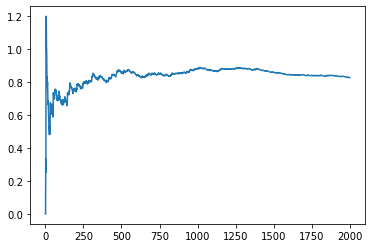

In [23]:
L_10 = [overlap(w2v_model_novice, w2v_model_exp, 10, word) for word in words_common[:2000]]
plt.plot([np.mean(L_10[:i]) for i in range(2000)])

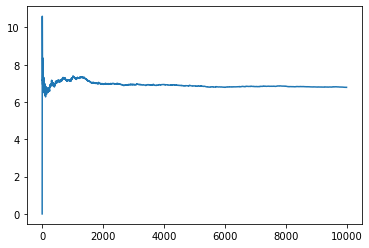

In [28]:
L_100 = [overlap(w2v_model_novice, w2v_model_exp, 100, word) for word in words_common[:10000]]
plt.plot([np.mean(L_100[:i]) for i in range(10000)])

/Users/lilianmarey/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/lilianmarey/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


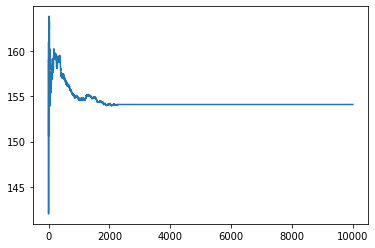

In [56]:
L_1000 = [overlap(w2v_model_novice, w2v_model_exp, 1000, word) for word in words_common[:10000]]
plt.plot([np.mean(L_1000[:i]) for i in range(10000)])

In [53]:
def rank(model, i, j):
    
    k = -1
    K = 10
    
    while k == -1 and 10 * K < len(words_exp):
        neighborhood = [i[0] for i in model.wv.most_similar(positive=[i], topn = K)]
        try:
            k = neighborhood.index(j)
        except:
            k = -1
        K *= 10
            
    return k + 1

def spread(model1, model2, n, word):

    neighborhood_1 = [i[0] for i in model1.wv.most_similar(positive=[word], topn = n)]
    ranks = [rank(model2, word, j) for j in neighborhood_1]
    return max(ranks)

In [54]:
#print(w2v_model_exp.wv.most_similar(positive=['droite'], topn = 10))
#rank(w2v_model_exp, 'droite', 'sarkozysme')

In [55]:
spread(w2v_model_novice, w2v_model_exp, 10, 'droite')

831

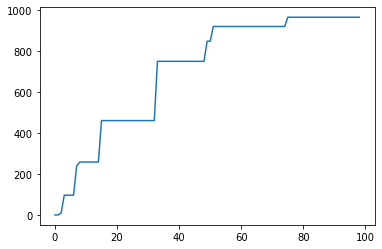

In [59]:
plt.plot([spread(w2v_model_novice, w2v_model_exp, i, 'demain') for i in range(1,100)])

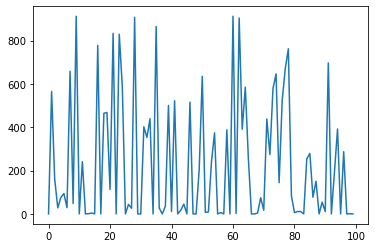

In [60]:
plt.plot([spread(w2v_model_novice, w2v_model_exp, 6, word) for word in words_common[:100]])

## WMD 

In [10]:
# Normalisation des vecteurs

w2v_model_exp.init_sims(replace = True)
w2v_model_novice.init_sims(replace = True)

2021-02-22 09:44:19,448 : INFO : precomputing L2-norms of word weight vectors
2021-02-22 09:44:19,600 : INFO : precomputing L2-norms of word weight vectors


In [19]:
df0 = pd.read_csv('data/data_cleaned_NLP.csv', sep = ',', encoding = 'latin-1')

In [23]:
df1 = df0[['Réplique', 'Groupe', 'tokenized_replique', 'Orateur']].copy()

df_novice = df1[df1['Groupe'] == 'Novice'].copy()
df_exp = df1[df1['Groupe'] == 'Exp'].copy()

In [58]:
df_novice = df_novice.dropna()

df_exp = df_exp.dropna()

2021-02-22 10:02:28,404 : INFO : NumExpr defaulting to 4 threads.


In [33]:
phrase0 = df_novice.iloc[0]['tokenized_replique'].split(' ')
phrase1 = df_novice.iloc[1]['tokenized_replique'].split(' ')
phrase2 = df_novice.iloc[2]['tokenized_replique'].split(' ')

### Calcul des distances intra

#### Novices

In [70]:
df_novice_shuffled = df_novice.sample(frac=1)
phrases_novice = [df_novice_shuffled.iloc[i]['tokenized_replique'].split(' ') for i in range(2 * 2000)]

In [71]:
WMD_novices = [w2v_model_novice.wmdistance(phrases_novice[i], phrases_novice[i + 1]) for i in range(0, 4000, 2)]

<ipython-input-71-fd016fc35ff4>:1: DeprecationWarning: Call to deprecated `wmdistance` (Method will be removed in 4.0.0, use self.wv.wmdistance() instead).
  WMD_novices = [w2v_model_novice.wmdistance(phrases_novice[i], phrases_novice[i + 1]) for i in range(0, 4000, 2)]
2021-02-22 10:13:31,406 : INFO : Removed 0 and 3 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:31,409 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:31,411 : INFO : built Dictionary(73 unique tokens: ['agit', 'alinéa', 'amendement', 'amis', 'belges']...) from 2 documents (total 81 corpus positions)
2021-02-22 10:13:31,473 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:31,474 : INFO : built Dictionary(24 unique tokens: ['a', 'ainsi', 'aussi', 'autres', 'bâtiment']...) from 2 documents (total 25 corpus positions)
2021-02-22 10:13:31,496 : INFO : Removed 1 and 4 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:31,499 : INFO

2021-02-22 10:13:32,523 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:32,524 : INFO : built Dictionary(48 unique tokens: ['afin', 'alternative', 'amendements', 'années', 'arriver']...) from 2 documents (total 52 corpus positions)
2021-02-22 10:13:32,537 : INFO : Removed 0 and 6 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:32,539 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:32,543 : INFO : built Dictionary(51 unique tokens: ['amendements', 'modifier', 'revanche', 'veulent', 'a']...) from 2 documents (total 57 corpus positions)
2021-02-22 10:13:32,555 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:32,558 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:32,560 : INFO : built Dictionary(47 unique tokens: ['acquise', 'agence', 'assurances', 'assurée', 'autorité']...) from 2 documents (total 58 corpus positions)
2021-02-22 10:13:32

2021-02-22 10:13:33,266 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:33,267 : INFO : built Dictionary(100 unique tokens: ['a', 'amendement', 'bus', 'car', 'cité']...) from 2 documents (total 123 corpus positions)
2021-02-22 10:13:33,397 : INFO : Removed 2 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:33,400 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:33,403 : INFO : built Dictionary(60 unique tokens: ['baisse', 'bonus', 'ceux', 'charges', 'contrats']...) from 2 documents (total 74 corpus positions)
2021-02-22 10:13:33,450 : INFO : Removed 4 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:33,452 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:33,453 : INFO : built Dictionary(39 unique tokens: ['acquérir', 'action', 'afin', 'agit', 'autorisés']...) from 2 documents (total 40 corpus positions)
2021-02-22 10:13:33,465 : INFO : Removed 0 and 

2021-02-22 10:13:34,305 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:34,306 : INFO : built Dictionary(12 unique tokens: ['explications', 'ministre', 'mme', 'retire', 'satisfont']...) from 2 documents (total 12 corpus positions)
2021-02-22 10:13:34,311 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:34,313 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:34,315 : INFO : built Dictionary(68 unique tokens: ['ainsi', 'avenir', 'avoir', 'cadre', 'celui']...) from 2 documents (total 72 corpus positions)
2021-02-22 10:13:34,390 : INFO : Removed 1 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:34,391 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:34,393 : INFO : built Dictionary(45 unique tokens: ['aide', 'apportés', 'certains', 'commune', 'hui']...) from 2 documents (total 47 corpus positions)
2021-02-22 10:13:34,411 : INFO : Remo

2021-02-22 10:13:35,013 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:35,014 : INFO : built Dictionary(6 unique tokens: ['ah', 'comme', 'vu', 'ça', 'bien']...) from 2 documents (total 6 corpus positions)
2021-02-22 10:13:35,016 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:35,018 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:35,019 : INFO : built Dictionary(38 unique tokens: ['accepter', 'allons', 'amendement', 'catégories', 'cet']...) from 2 documents (total 39 corpus positions)
2021-02-22 10:13:35,036 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:35,037 : INFO : built Dictionary(27 unique tokens: ['apporté', 'assemblée', 'commission', 'coordination', 'différentes']...) from 2 documents (total 29 corpus positions)
2021-02-22 10:13:35,051 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:35,052 : INFO :

2021-02-22 10:13:35,763 : INFO : Removed 2 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:35,765 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:35,766 : INFO : built Dictionary(59 unique tokens: ['accompagnement', 'affectation', 'agisse', 'annuelle', 'apporte']...) from 2 documents (total 63 corpus positions)
2021-02-22 10:13:35,799 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:35,800 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:35,801 : INFO : built Dictionary(23 unique tokens: ['amendement', 'autorité', 'autres', 'cet', 'clarifier']...) from 2 documents (total 23 corpus positions)
2021-02-22 10:13:35,814 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:35,823 : INFO : built Dictionary(32 unique tokens: ['accueille', 'an', 'années', 'budget', 'cela']...) from 2 documents (total 32 corpus positions)
2021-02-22 10:13:35,83

2021-02-22 10:13:36,606 : INFO : Removed 1 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:36,607 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:36,608 : INFO : built Dictionary(64 unique tokens: ['a', 'alors', 'car', 'certaine', 'certaines']...) from 2 documents (total 72 corpus positions)
2021-02-22 10:13:36,649 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:36,650 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:36,651 : INFO : built Dictionary(27 unique tokens: ['celle', 'danger', 'devoir', 'france', 'français']...) from 2 documents (total 28 corpus positions)
2021-02-22 10:13:36,664 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:36,665 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:36,667 : INFO : built Dictionary(42 unique tokens: ['autrement', 'aérien', 'aériens', 'carbone', '

2021-02-22 10:13:37,192 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:37,195 : INFO : built Dictionary(52 unique tokens: ['avoir', 'doute', 'instaurer', 'presque', 'proposons']...) from 2 documents (total 62 corpus positions)
2021-02-22 10:13:37,221 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:37,223 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:37,224 : INFO : built Dictionary(27 unique tokens: ['amendement', 'premier', 'propos', 'quant', 'renvoie']...) from 2 documents (total 28 corpus positions)
2021-02-22 10:13:37,231 : INFO : Removed 2 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:37,233 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:37,234 : INFO : built Dictionary(83 unique tokens: ['actuel', 'ans', 'arguments', 'cette', 'convaincus']...) from 2 documents (total 93 corpus positions)
2021-02-22 10:13:37,296 : IN

2021-02-22 10:13:37,836 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:37,837 : INFO : built Dictionary(39 unique tokens: ['a', 'accordent', 'adoption', 'article', 'celui']...) from 2 documents (total 42 corpus positions)
2021-02-22 10:13:37,855 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:37,856 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:37,858 : INFO : built Dictionary(42 unique tokens: ['alors', 'amp', 'appelle', 'autorise', 'autres']...) from 2 documents (total 52 corpus positions)
2021-02-22 10:13:37,866 : INFO : Removed 2 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:37,868 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:37,870 : INFO : built Dictionary(60 unique tokens: ['abandon', 'absence', 'accentuer', 'acteurs', 'car']...) from 2 documents (total 62 corpus positions)
2021-02-22 10:13:37,907 : INFO : Remove

2021-02-22 10:13:38,525 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:38,526 : INFO : built Dictionary(17 unique tokens: ['culpabilité', 'défaut', 'procès', 'présomption', 'solidarité']...) from 2 documents (total 17 corpus positions)
2021-02-22 10:13:38,533 : INFO : Removed 1 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:38,535 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:38,537 : INFO : built Dictionary(80 unique tokens: ['accèdent', 'bonne', 'cela', 'certainement', 'charge']...) from 2 documents (total 90 corpus positions)
2021-02-22 10:13:38,615 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:38,616 : INFO : built Dictionary(66 unique tokens: ['activement', 'ainsi', 'base', 'bases', 'beps']...) from 2 documents (total 72 corpus positions)
2021-02-22 10:13:38,652 : INFO : Removed 3 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:38,653 

2021-02-22 10:13:39,479 : INFO : built Dictionary(54 unique tokens: ['ambitieux', 'amendement', 'avis', 'chère', 'collègue']...) from 2 documents (total 56 corpus positions)
2021-02-22 10:13:39,504 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:39,506 : INFO : built Dictionary(12 unique tokens: ['amendement', 'défendu', 'espère', 'rapporteure', 'suivant']...) from 2 documents (total 13 corpus positions)
2021-02-22 10:13:39,512 : INFO : Removed 1 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:39,513 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:39,515 : INFO : built Dictionary(37 unique tokens: ['alimentaires', 'assurera', 'avance', 'compensation', 'denis']...) from 2 documents (total 38 corpus positions)
2021-02-22 10:13:39,536 : INFO : Removed 3 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:39,538 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 

2021-02-22 10:13:40,232 : INFO : Removed 1 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:40,235 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:40,239 : INFO : built Dictionary(82 unique tokens: ['a', 'attaché', 'attachée', 'aussi', 'chers']...) from 2 documents (total 92 corpus positions)
2021-02-22 10:13:40,307 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:40,309 : INFO : built Dictionary(4 unique tokens: ['avis', 'défavorable', 'rapporteure', 'gentil']) from 2 documents (total 4 corpus positions)
2021-02-22 10:13:40,311 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:40,315 : INFO : built Dictionary(45 unique tokens: ['avis', 'cherchons', 'défavorable', 'exercice', 'extérieur']...) from 2 documents (total 48 corpus positions)
2021-02-22 10:13:40,330 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:40,332 : INFO : adding d

2021-02-22 10:13:40,785 : INFO : built Dictionary(51 unique tokens: ['a', 'alors', 'améliorer', 'année', 'atteint']...) from 2 documents (total 51 corpus positions)
2021-02-22 10:13:40,808 : INFO : Removed 2 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:40,809 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:40,811 : INFO : built Dictionary(65 unique tokens: ['adapter', 'ainsi', 'amendement', 'article', 'aussi']...) from 2 documents (total 72 corpus positions)
2021-02-22 10:13:40,875 : INFO : Removed 1 and 3 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:40,877 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:40,878 : INFO : built Dictionary(49 unique tokens: ['avant', 'budget', 'certains', 'cet', 'choisi']...) from 2 documents (total 54 corpus positions)
2021-02-22 10:13:40,909 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:40,911 : INFO : built Dic

2021-02-22 10:13:41,466 : INFO : built Dictionary(23 unique tokens: ['a', 'amendements', 'avis', 'brûle', 'crois']...) from 2 documents (total 26 corpus positions)
2021-02-22 10:13:41,475 : INFO : Removed 2 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:41,477 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:41,482 : INFO : built Dictionary(48 unique tokens: ['a', 'adapte', 'alors', 'autre', 'avancer']...) from 2 documents (total 49 corpus positions)
2021-02-22 10:13:41,498 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:41,501 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:41,503 : INFO : built Dictionary(46 unique tokens: ['artifices', 'assurer', 'budget', 'celui', 'critiquez']...) from 2 documents (total 48 corpus positions)
2021-02-22 10:13:41,524 : INFO : Removed 0 and 14 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:41,525 : INFO : a

2021-02-22 10:13:42,194 : INFO : Removed 2 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:42,196 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:42,201 : INFO : built Dictionary(79 unique tokens: ['abaissant', 'abondement', 'actionnaires', 'actionnariat', 'amendement']...) from 2 documents (total 89 corpus positions)
2021-02-22 10:13:42,268 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:42,270 : INFO : built Dictionary(49 unique tokens: ['abondement', 'adapter', 'afin', 'ailleurs', 'aménage']...) from 2 documents (total 53 corpus positions)
2021-02-22 10:13:42,300 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:42,301 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:42,303 : INFO : built Dictionary(24 unique tokens: ['accessibilité', 'ainsi', 'annulé', 'bâtiments', 'conforme']...) from 2 documents (total 24 corpus positions)
2

2021-02-22 10:13:42,845 : INFO : Removed 4 and 3 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:42,848 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:42,851 : INFO : built Dictionary(92 unique tokens: ['appel', 'autour', 'cadre', 'cette', 'choses']...) from 2 documents (total 104 corpus positions)
2021-02-22 10:13:42,914 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:42,916 : INFO : built Dictionary(29 unique tokens: ['assemblée', 'avancer', 'cette', 'confiance', 'entamer']...) from 2 documents (total 30 corpus positions)
2021-02-22 10:13:42,926 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:42,930 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:42,932 : INFO : built Dictionary(23 unique tokens: ['information', 'instaure', 'obligation', 'porte', 'toutefois']...) from 2 documents (total 23 corpus positions)
2021-02-22 10:13:42,940

2021-02-22 10:13:43,483 : INFO : Removed 0 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:43,485 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:43,488 : INFO : built Dictionary(82 unique tokens: ['acteurs', 'ailleurs', 'année', 'calendrier', 'cet']...) from 2 documents (total 89 corpus positions)
2021-02-22 10:13:43,544 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:43,545 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:43,546 : INFO : built Dictionary(38 unique tokens: ['évidemment', 'affiches', 'ainsi', 'appelle', 'attendons']...) from 2 documents (total 38 corpus positions)
2021-02-22 10:13:43,551 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:43,555 : INFO : built Dictionary(56 unique tokens: ['boussole', 'capable', 'chacun', 'circonstances', 'collègues']...) from 2 documents (total 60 corpus positions)
2021-02-22 10:13

2021-02-22 10:13:44,270 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:44,271 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:44,276 : INFO : built Dictionary(43 unique tokens: ['amendement', 'amp', 'apparition', 'aussi', 'autonomie']...) from 2 documents (total 43 corpus positions)
2021-02-22 10:13:44,283 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:44,285 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:44,286 : INFO : built Dictionary(78 unique tokens: ['a', 'arrêtons', 'autorisée', 'avoir', 'conventions']...) from 2 documents (total 88 corpus positions)
2021-02-22 10:13:44,325 : INFO : Removed 4 and 3 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:44,327 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:44,328 : INFO : built Dictionary(54 unique tokens: ['actuelle', 'amendement', 'annex

2021-02-22 10:13:44,935 : INFO : built Dictionary(34 unique tokens: ['celle', 'changement', 'cohérence', 'compte', 'doit']...) from 2 documents (total 38 corpus positions)
2021-02-22 10:13:44,949 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:44,951 : INFO : built Dictionary(24 unique tokens: ['a', 'commission', 'décisions', 'levée', 'prises']...) from 2 documents (total 24 corpus positions)
2021-02-22 10:13:44,957 : INFO : Removed 0 and 25 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:44,959 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:44,960 : INFO : built Dictionary(86 unique tokens: ['avis', 'cette', 'favorable', 'intéressante', 'ordre']...) from 2 documents (total 95 corpus positions)
2021-02-22 10:13:44,996 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:44,997 : INFO : built Dictionary(8 unique tokens: ['amendement', 'conclure', 'introduit', 'rappelle', 'amendem

2021-02-22 10:13:45,680 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:45,681 : INFO : built Dictionary(27 unique tokens: ['agit', 'car', 'cause', 'deux', 'dis']...) from 2 documents (total 30 corpus positions)
2021-02-22 10:13:45,688 : INFO : Removed 1 and 3 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:45,689 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:45,690 : INFO : built Dictionary(38 unique tokens: ['ainsi', 'articles', 'chers', 'collègues', 'continuer']...) from 2 documents (total 45 corpus positions)
2021-02-22 10:13:45,705 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:45,707 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:45,708 : INFO : built Dictionary(21 unique tokens: ['ailleurs', 'dérives', 'emparer', 'expert', 'identifié']...) from 2 documents (total 24 corpus positions)
2021-02-22 10:13:45,713 : INFO : Remove

2021-02-22 10:13:46,219 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:46,222 : INFO : built Dictionary(64 unique tokens: ['a', 'clients', 'concerné', 'distribution', 'exceptionnel']...) from 2 documents (total 70 corpus positions)
2021-02-22 10:13:46,257 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:46,258 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:46,259 : INFO : built Dictionary(84 unique tokens: ['a', 'aboutir', 'ambition', 'assurant', 'attente']...) from 2 documents (total 97 corpus positions)
2021-02-22 10:13:46,338 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:46,340 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:46,341 : INFO : built Dictionary(37 unique tokens: ['ainsi', 'application', 'appliquée', 'bis', 'bruxelles']...) from 2 documents (total 38 corpus positions)
2021-02-22 10:13:46,349

2021-02-22 10:13:47,201 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:47,203 : INFO : built Dictionary(16 unique tokens: ['attentivement', 'demande', 'faire', 'rapporteure', 'tous']...) from 2 documents (total 16 corpus positions)
2021-02-22 10:13:47,209 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:47,210 : INFO : built Dictionary(9 unique tokens: ['secrétaire', 'vrai', 'état', 'connaît', 'encore']...) from 2 documents (total 9 corpus positions)
2021-02-22 10:13:47,215 : INFO : Removed 1 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:47,219 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:47,224 : INFO : built Dictionary(22 unique tokens: ['condamner', 'dont', 'fois', 'inaction', 'manifeste']...) from 2 documents (total 22 corpus positions)
2021-02-22 10:13:47,233 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:47,241 : INFO : built

2021-02-22 10:13:47,857 : INFO : built Dictionary(41 unique tokens: ['a', 'aussi', 'cas', 'commission', 'compromis']...) from 2 documents (total 41 corpus positions)
2021-02-22 10:13:47,877 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:47,879 : INFO : built Dictionary(8 unique tokens: ['auditions', 'commission', 'faux', 'présent', 'rapporteur']...) from 2 documents (total 9 corpus positions)
2021-02-22 10:13:47,881 : INFO : Removed 2 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:47,887 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:47,889 : INFO : built Dictionary(70 unique tokens: ['afin', 'amont', 'attendues', 'attractivité', 'bénéfices']...) from 2 documents (total 71 corpus positions)
2021-02-22 10:13:47,941 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:47,942 : INFO : built Dictionary(45 unique tokens: ['a', 'abus', 'aussi', 'employeurs', 'expertises']...) 

2021-02-22 10:13:48,427 : INFO : built Dictionary(31 unique tokens: ['amendements', 'commission', 'favorable', 'adverbe', 'ailleurs']...) from 2 documents (total 33 corpus positions)
2021-02-22 10:13:48,434 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:48,435 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:48,436 : INFO : built Dictionary(29 unique tokens: ['bien', 'travail', 'vivre', 'alors', 'ancien']...) from 2 documents (total 34 corpus positions)
2021-02-22 10:13:48,440 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:48,441 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:48,442 : INFO : built Dictionary(16 unique tokens: ['inquiétez', 'bien', 'car', 'communes', 'convaincre']...) from 2 documents (total 16 corpus positions)
2021-02-22 10:13:48,445 : INFO : Removed 0 and 3 OOV words from document 1 and 2 (respectively).
2021-02-22 10:1

2021-02-22 10:13:49,027 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:49,028 : INFO : built Dictionary(23 unique tokens: ['défavorable', 'faut', 'laisser', 'organiser', 'producteurs']...) from 2 documents (total 23 corpus positions)
2021-02-22 10:13:49,034 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:49,035 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:49,036 : INFO : built Dictionary(28 unique tokens: ['défavorable', 'rapporteure', 'alors', 'amendements', 'avis']...) from 2 documents (total 30 corpus positions)
2021-02-22 10:13:49,040 : INFO : Removed 5 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:49,042 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:49,043 : INFO : built Dictionary(35 unique tokens: ['agit', 'avis', 'bon', 'certes', 'comptes']...) from 2 documents (total 39 corpus positions)
2021-02-22 10:13:49,054

2021-02-22 10:13:49,578 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:49,580 : INFO : built Dictionary(36 unique tokens: ['affaires', 'article', 'chers', 'collègues', 'commission']...) from 2 documents (total 38 corpus positions)
2021-02-22 10:13:49,593 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:49,594 : INFO : built Dictionary(25 unique tokens: ['a', 'amendement', 'car', 'cet', 'champ']...) from 2 documents (total 25 corpus positions)
2021-02-22 10:13:49,599 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:49,601 : INFO : built Dictionary(19 unique tokens: ['car', 'chacun', 'devant', 'devra', 'débat']...) from 2 documents (total 19 corpus positions)
2021-02-22 10:13:49,605 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:49,606 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:49,608 : INFO : built Dictionary(61 un

2021-02-22 10:13:50,484 : INFO : built Dictionary(39 unique tokens: ['a', 'assemblée', 'auchan', 'augmenté', 'avoir']...) from 2 documents (total 45 corpus positions)
2021-02-22 10:13:50,493 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:50,494 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:50,496 : INFO : built Dictionary(30 unique tokens: ['accords', 'agissant', 'alinéa', 'ans', 'application']...) from 2 documents (total 30 corpus positions)
2021-02-22 10:13:50,507 : INFO : Removed 2 and 5 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:50,509 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:50,514 : INFO : built Dictionary(57 unique tokens: ['accepté', 'alors', 'avoir', 'demi', 'global']...) from 2 documents (total 64 corpus positions)
2021-02-22 10:13:50,558 : INFO : Removed 1 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:50,560 : INFO

2021-02-22 10:13:51,155 : INFO : Removed 0 and 6 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:51,157 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:51,159 : INFO : built Dictionary(27 unique tokens: ['rapporteure', 'rédactionnel', 'abondamment', 'ainsi', 'attachée']...) from 2 documents (total 28 corpus positions)
2021-02-22 10:13:51,169 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:51,171 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:51,172 : INFO : built Dictionary(29 unique tokens: ['défendu', 'avis', 'centres', 'cette', 'collectivités']...) from 2 documents (total 34 corpus positions)
2021-02-22 10:13:51,179 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:51,180 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:51,182 : INFO : built Dictionary(17 unique tokens: ['vrai', 'contenus', 

2021-02-22 10:13:52,362 : INFO : built Dictionary(54 unique tokens: ['a', 'adhérer', 'adoption', 'alors', 'biologique']...) from 2 documents (total 60 corpus positions)
2021-02-22 10:13:52,411 : INFO : Removed 1 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:52,414 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:52,416 : INFO : built Dictionary(58 unique tokens: ['amendement', 'améliorée', 'avis', 'budgétaire', 'cet']...) from 2 documents (total 70 corpus positions)
2021-02-22 10:13:52,461 : INFO : Removed 3 and 8 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:52,462 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:52,464 : INFO : built Dictionary(149 unique tokens: ['a', 'accompagnement', 'accélérée', 'adaptation', 'afin']...) from 2 documents (total 175 corpus positions)
2021-02-22 10:13:52,774 : INFO : Removed 0 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:

2021-02-22 10:13:53,887 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:53,889 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:53,891 : INFO : built Dictionary(52 unique tokens: ['a', 'accès', 'accéder', 'amendement', 'b']...) from 2 documents (total 57 corpus positions)
2021-02-22 10:13:53,921 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:53,923 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:53,925 : INFO : built Dictionary(43 unique tokens: ['aucun', 'aucune', 'aveugle', 'cité', 'convenons']...) from 2 documents (total 47 corpus positions)
2021-02-22 10:13:53,943 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:53,944 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:53,945 : INFO : built Dictionary(37 unique tokens: ['amendement', 'donc', 'défaut', 'défavorable', '

2021-02-22 10:13:54,708 : INFO : built Dictionary(65 unique tokens: ['a', 'achat', 'amendements', 'années', 'austérité']...) from 2 documents (total 71 corpus positions)
2021-02-22 10:13:54,748 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:54,749 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:54,752 : INFO : built Dictionary(68 unique tokens: ['action', 'adapté', 'charge', 'concernant', 'crédibilité']...) from 2 documents (total 71 corpus positions)
2021-02-22 10:13:54,804 : INFO : Removed 3 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:54,806 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:54,807 : INFO : built Dictionary(33 unique tokens: ['a', 'barcelone', 'budget', 'comme', 'craindre']...) from 2 documents (total 36 corpus positions)
2021-02-22 10:13:54,821 : INFO : Removed 2 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:54,8

2021-02-22 10:13:55,786 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:55,788 : INFO : built Dictionary(45 unique tokens: ['avoir', 'chers', 'collègues', 'devrions', 'débats']...) from 2 documents (total 45 corpus positions)
2021-02-22 10:13:55,797 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:55,798 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:55,800 : INFO : built Dictionary(36 unique tokens: ['absolument', 'alinéa', 'article', 'assemblée', 'avant']...) from 2 documents (total 39 corpus positions)
2021-02-22 10:13:55,814 : INFO : Removed 0 and 3 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:55,815 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:55,816 : INFO : built Dictionary(54 unique tokens: ['loi', 'peut', 'proposition', 'revenir', 'accompagnement']...) from 2 documents (total 58 corpus positions)
2021-02-22 10:13:55,83

2021-02-22 10:13:56,825 : INFO : built Dictionary(50 unique tokens: ['a', 'bien', 'convenir', 'dispositions', 'entendu']...) from 2 documents (total 52 corpus positions)
2021-02-22 10:13:56,872 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:56,875 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:56,876 : INFO : built Dictionary(56 unique tokens: ['a', 'amendements', 'amenée', 'cette', 'comment']...) from 2 documents (total 63 corpus positions)
2021-02-22 10:13:56,895 : INFO : Removed 10 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:56,896 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:56,900 : INFO : built Dictionary(68 unique tokens: ['a', 'actions', 'alternative', 'an', 'avancée']...) from 2 documents (total 75 corpus positions)
2021-02-22 10:13:56,953 : INFO : Removed 1 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:56,959 : INFO

2021-02-22 10:13:58,022 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:58,024 : INFO : built Dictionary(33 unique tokens: ['a', 'accorde', 'autorité', 'convention', 'droit']...) from 2 documents (total 35 corpus positions)
2021-02-22 10:13:58,042 : INFO : Removed 5 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:58,044 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:58,052 : INFO : built Dictionary(75 unique tokens: ['a', 'amiante', 'ans', 'causer', 'cinquante']...) from 2 documents (total 87 corpus positions)
2021-02-22 10:13:58,113 : INFO : Removed 0 and 4 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:58,118 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:58,119 : INFO : built Dictionary(64 unique tokens: ['apprentissage', 'associatifs', 'bénéfique', 'clubs', 'contrat']...) from 2 documents (total 70 corpus positions)
2021-02-22 10:13:58,153 : INF

2021-02-22 10:13:58,888 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:58,889 : INFO : built Dictionary(11 unique tokens: ['attendons', 'excusez', 'impatience', 'maintenant', 'peu']...) from 2 documents (total 11 corpus positions)
2021-02-22 10:13:58,891 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:58,893 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:58,894 : INFO : built Dictionary(32 unique tokens: ['donc', 'démocratie', 'essentiel', 'a', 'améliorant']...) from 2 documents (total 34 corpus positions)
2021-02-22 10:13:58,902 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:58,904 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:58,906 : INFO : built Dictionary(23 unique tokens: ['affectent', 'ailleurs', 'denses', 'difficultés', 'démographiques']...) from 2 documents (total 23 corpus positions)
2021-02-22

2021-02-22 10:13:59,453 : INFO : built Dictionary(60 unique tokens: ['allons', 'amendement', 'beau', 'bien', 'bon']...) from 2 documents (total 66 corpus positions)
2021-02-22 10:13:59,488 : INFO : Removed 0 and 4 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:59,489 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:59,490 : INFO : built Dictionary(55 unique tokens: ['affiliées', 'afin', 'alléger', 'amendement', 'appartiendra']...) from 2 documents (total 63 corpus positions)
2021-02-22 10:13:59,525 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:13:59,527 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:59,530 : INFO : built Dictionary(40 unique tokens: ['achat', 'avoir', 'cette', 'comme', 'comprise']...) from 2 documents (total 43 corpus positions)
2021-02-22 10:13:59,549 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:13:59,551 : INFO : b

2021-02-22 10:14:00,114 : INFO : Removed 0 and 5 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:00,116 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:00,118 : INFO : built Dictionary(74 unique tokens: ['entre', 'omc', 'onu', 'quel', 'rapport']...) from 2 documents (total 82 corpus positions)
2021-02-22 10:14:00,132 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:00,134 : INFO : built Dictionary(42 unique tokens: ['a', 'adoption', 'amendements', 'août', 'avant']...) from 2 documents (total 44 corpus positions)
2021-02-22 10:14:00,151 : INFO : Removed 1 and 4 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:00,153 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:00,154 : INFO : built Dictionary(57 unique tokens: ['autant', 'avenir', 'changeons', 'comme', 'comprends']...) from 2 documents (total 61 corpus positions)
2021-02-22 10:14:00,189 : INFO : Removed 0 an

2021-02-22 10:14:00,969 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:00,970 : INFO : built Dictionary(65 unique tokens: ['aviragnet', 'avis', 'cfa', 'chose', 'critères']...) from 2 documents (total 73 corpus positions)
2021-02-22 10:14:01,002 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:01,003 : INFO : built Dictionary(7 unique tokens: ['choix', 'débat', 'fait', 'opacité', 'révèle']...) from 2 documents (total 7 corpus positions)
2021-02-22 10:14:01,011 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:01,017 : INFO : built Dictionary(33 unique tokens: ['amendement', 'gouvernement', 'proposition', 'remercie', 'retire']...) from 2 documents (total 36 corpus positions)
2021-02-22 10:14:01,025 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:01,027 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:01,028 : INFO : built D

2021-02-22 10:14:01,742 : INFO : built Dictionary(26 unique tokens: ['accords', 'ancrage', 'appel', 'aucun', 'brièvement']...) from 2 documents (total 27 corpus positions)
2021-02-22 10:14:01,747 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:01,751 : INFO : built Dictionary(17 unique tokens: ['donc', 'exactement', 'faisons', 'rangs', 'rejoignez']...) from 2 documents (total 17 corpus positions)
2021-02-22 10:14:01,757 : INFO : Removed 0 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:01,759 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:01,760 : INFO : built Dictionary(49 unique tokens: ['certaines', 'débats', 'existe', 'ici', 'inscrire']...) from 2 documents (total 52 corpus positions)
2021-02-22 10:14:01,779 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:01,781 : INFO : built Dictionary(49 unique tokens: ['autre', 'continent', 'courir', 'où', 'plus']...) from 2 d

2021-02-22 10:14:02,541 : INFO : Removed 3 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:02,543 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:02,544 : INFO : built Dictionary(43 unique tokens: ['accident', 'accidents', 'allés', 'beaucoup', 'carré']...) from 2 documents (total 50 corpus positions)
2021-02-22 10:14:02,563 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:02,567 : INFO : built Dictionary(7 unique tokens: ['analyse', 'avis', 'rapporteur', 'secrétaire', 'état']...) from 2 documents (total 7 corpus positions)
2021-02-22 10:14:02,570 : INFO : Removed 1 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:02,572 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:02,574 : INFO : built Dictionary(73 unique tokens: ['crédits', 'démarches', 'ehpad', 'enfin', 'euros']...) from 2 documents (total 75 corpus positions)
2021-02-22 10:14:02,611 : INFO :

2021-02-22 10:14:03,364 : INFO : built Dictionary(61 unique tokens: ['a', 'affaires', 'avenir', 'cathédrale', 'commission']...) from 2 documents (total 62 corpus positions)
2021-02-22 10:14:03,389 : INFO : Removed 2 and 11 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:03,390 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:03,390 : INFO : built Dictionary(45 unique tokens: ['absolument', 'amendement', 'cet', 'comme', 'commun']...) from 2 documents (total 47 corpus positions)
2021-02-22 10:14:03,403 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:03,404 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:03,406 : INFO : built Dictionary(45 unique tokens: ['ainsi', 'amendement', 'apportera', 'article', 'besoins']...) from 2 documents (total 46 corpus positions)
2021-02-22 10:14:03,424 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10

2021-02-22 10:14:03,963 : INFO : Removed 2 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:03,965 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:03,967 : INFO : built Dictionary(50 unique tokens: ['afin', 'appelez', 'aussi', 'capital', 'cela']...) from 2 documents (total 52 corpus positions)
2021-02-22 10:14:03,991 : INFO : Removed 2 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:03,992 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:03,994 : INFO : built Dictionary(73 unique tokens: ['a', 'assemblées', 'aussi', 'avenir', 'bien']...) from 2 documents (total 79 corpus positions)
2021-02-22 10:14:04,054 : INFO : Removed 3 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:04,055 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:04,056 : INFO : built Dictionary(108 unique tokens: ['a', 'administration', 'ans', 'applaudissements',

2021-02-22 10:14:04,965 : INFO : built Dictionary(39 unique tokens: ['affaiblies', 'aller', 'delà', 'demandent', 'elles']...) from 2 documents (total 41 corpus positions)
2021-02-22 10:14:05,005 : INFO : Removed 1 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:05,008 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:05,035 : INFO : built Dictionary(70 unique tokens: ['abusif', 'accompagnement', 'accès', 'adaptées', 'affaiblir']...) from 2 documents (total 74 corpus positions)
2021-02-22 10:14:05,074 : INFO : Removed 3 and 7 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:05,078 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:05,081 : INFO : built Dictionary(67 unique tokens: ['autres', 'celles', 'chacun', 'chose', 'comme']...) from 2 documents (total 81 corpus positions)
2021-02-22 10:14:05,123 : INFO : Removed 3 and 4 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:0

2021-02-22 10:14:05,702 : INFO : built Dictionary(25 unique tokens: ['auprès', 'celle', 'cette', 'compétence', 'différentes']...) from 2 documents (total 25 corpus positions)
2021-02-22 10:14:05,711 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:05,712 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:05,714 : INFO : built Dictionary(84 unique tokens: ['a', 'absolue', 'accord', 'adapter', 'bloc']...) from 2 documents (total 87 corpus positions)
2021-02-22 10:14:05,779 : INFO : Removed 4 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:05,782 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:05,784 : INFO : built Dictionary(86 unique tokens: ['a', 'accepter', 'administratif', 'appliquer', 'article']...) from 2 documents (total 99 corpus positions)
2021-02-22 10:14:05,840 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:05,8

2021-02-22 10:14:06,453 : INFO : Removed 0 and 3 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:06,455 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:06,456 : INFO : built Dictionary(46 unique tokens: ['accompagner', 'ambition', 'autre', 'dame', 'dernières']...) from 2 documents (total 48 corpus positions)
2021-02-22 10:14:06,477 : INFO : Removed 2 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:06,478 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:06,479 : INFO : built Dictionary(48 unique tokens: ['a', 'acteurs', 'afin', 'aide', 'bénéficier']...) from 2 documents (total 49 corpus positions)
2021-02-22 10:14:06,505 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:06,512 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:06,513 : INFO : built Dictionary(55 unique tokens: ['a', 'amendement', 'amendements', 'an', 

2021-02-22 10:14:07,380 : INFO : Removed 0 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:07,381 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:07,384 : INFO : built Dictionary(40 unique tokens: ['avis', 'besoins', 'compétences', 'continue', 'défavorable']...) from 2 documents (total 41 corpus positions)
2021-02-22 10:14:07,401 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:07,402 : INFO : built Dictionary(8 unique tokens: ['cela', 'cher', 'collègue', 'dit', 'personne']...) from 2 documents (total 8 corpus positions)
2021-02-22 10:14:07,405 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:07,409 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:07,411 : INFO : built Dictionary(44 unique tokens: ['aide', 'bien', 'charge', 'chiffres', 'chronique']...) from 2 documents (total 47 corpus positions)
2021-02-22 10:14:07,429 : INFO : a

2021-02-22 10:14:07,844 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:07,846 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:07,847 : INFO : built Dictionary(41 unique tokens: ['besoins', 'cette', 'contre', 'correspondent', 'demandes']...) from 2 documents (total 44 corpus positions)
2021-02-22 10:14:07,862 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:07,864 : INFO : built Dictionary(42 unique tokens: ['aller', 'amendements', 'article', 'bon', 'cet']...) from 2 documents (total 42 corpus positions)
2021-02-22 10:14:07,881 : INFO : Removed 0 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:07,885 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:07,887 : INFO : built Dictionary(41 unique tokens: ['amendement', 'cet', 'dispositif', 'entre', 'femmes']...) from 2 documents (total 49 corpus positions)
2021-02-22 10:14:07,905 : INF

2021-02-22 10:14:08,370 : INFO : built Dictionary(101 unique tokens: ['accord', 'agression', 'arrive', 'cet', 'chers']...) from 2 documents (total 113 corpus positions)
2021-02-22 10:14:08,447 : INFO : Removed 4 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:08,448 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:08,449 : INFO : built Dictionary(40 unique tokens: ['complice', 'crimes', 'donc', 'délits', 'madame']...) from 2 documents (total 48 corpus positions)
2021-02-22 10:14:08,462 : INFO : Removed 4 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:08,464 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:08,466 : INFO : built Dictionary(52 unique tokens: ['abandonner', 'allons', 'autant', 'autre', 'car']...) from 2 documents (total 55 corpus positions)
2021-02-22 10:14:08,495 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:08,497 : INFO : built D

2021-02-22 10:14:08,969 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:08,970 : INFO : built Dictionary(11 unique tokens: ['avis', 'défavorable', 'rapporteure', 'spéciale', 'améliorer']...) from 2 documents (total 11 corpus positions)
2021-02-22 10:14:08,972 : INFO : Removed 2 and 4 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:08,973 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:08,974 : INFO : built Dictionary(60 unique tokens: ['actions', 'appellation', 'certaines', 'entreprises', 'envisagez']...) from 2 documents (total 63 corpus positions)
2021-02-22 10:14:09,003 : INFO : Removed 0 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:09,004 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:09,005 : INFO : built Dictionary(58 unique tokens: ['administration', 'adopté', 'amendement', 'article', 'bien']...) from 2 documents (total 63 corpus positions)


2021-02-22 10:14:09,499 : INFO : Removed 7 and 5 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:09,501 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:09,502 : INFO : built Dictionary(132 unique tokens: ['activité', 'alors', 'aucun', 'aucune', 'avant']...) from 2 documents (total 154 corpus positions)
2021-02-22 10:14:09,645 : INFO : Removed 1 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:09,647 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:09,648 : INFO : built Dictionary(50 unique tokens: ['autres', 'certains', 'choses', 'demandé', 'destinées']...) from 2 documents (total 55 corpus positions)
2021-02-22 10:14:09,669 : INFO : Removed 2 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:09,670 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:09,671 : INFO : built Dictionary(43 unique tokens: ['président', 'république', 'actuelle

2021-02-22 10:14:10,345 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:10,348 : INFO : built Dictionary(53 unique tokens: ['allons', 'attentes', 'cet', 'comblé', 'compte']...) from 2 documents (total 57 corpus positions)
2021-02-22 10:14:10,380 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:10,381 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:10,382 : INFO : built Dictionary(19 unique tokens: ['absence', 'cette', 'contrat', 'encadrement', 'enseignement']...) from 2 documents (total 20 corpus positions)
2021-02-22 10:14:10,386 : INFO : Removed 0 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:10,388 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:10,390 : INFO : built Dictionary(65 unique tokens: ['allongement', 'avancées', 'congé', 'contre', 'convient']...) from 2 documents (total 73 corpus positions)
2021-02-22 10:14:10,42

2021-02-22 10:14:11,106 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:11,107 : INFO : built Dictionary(98 unique tokens: ['a', 'accords', 'adapter', 'agilité', 'avancer']...) from 2 documents (total 104 corpus positions)
2021-02-22 10:14:11,190 : INFO : Removed 2 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:11,193 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:11,194 : INFO : built Dictionary(53 unique tokens: ['alors', 'assister', 'autant', 'bien', 'celui']...) from 2 documents (total 55 corpus positions)
2021-02-22 10:14:11,217 : INFO : Removed 3 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:11,219 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:11,220 : INFO : built Dictionary(66 unique tokens: ['a', 'agents', 'ajoute', 'amendements', 'application']...) from 2 documents (total 78 corpus positions)
2021-02-22 10:14:11,273 : INFO : Remov

2021-02-22 10:14:12,013 : INFO : Removed 2 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:12,015 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:12,016 : INFO : built Dictionary(41 unique tokens: ['appartient', 'architectural', 'artistique', 'avril', 'cathédrale']...) from 2 documents (total 43 corpus positions)
2021-02-22 10:14:12,027 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:12,028 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:12,030 : INFO : built Dictionary(44 unique tokens: ['accueillir', 'apporter', 'arrivent', 'auquel', 'cela']...) from 2 documents (total 47 corpus positions)
2021-02-22 10:14:12,047 : INFO : Removed 0 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:12,051 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:12,057 : INFO : built Dictionary(87 unique tokens: ['adopté', 'amendeme

2021-02-22 10:14:12,811 : INFO : Removed 7 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:12,812 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:12,813 : INFO : built Dictionary(44 unique tokens: ['adhésion', 'affaires', 'application', 'article', 'assemblée']...) from 2 documents (total 45 corpus positions)
2021-02-22 10:14:12,821 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:12,822 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:12,823 : INFO : built Dictionary(42 unique tokens: ['adjoint', 'amendement', 'appel', 'avis', 'besoin']...) from 2 documents (total 43 corpus positions)
2021-02-22 10:14:12,837 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:12,838 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:12,840 : INFO : built Dictionary(20 unique tokens: ['auprès', 'dernier', 'dimanc

2021-02-22 10:14:13,444 : INFO : built Dictionary(31 unique tokens: ['aussi', 'détaillées', 'face', 'gouvernement', 'inédite']...) from 2 documents (total 36 corpus positions)
2021-02-22 10:14:13,457 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:13,459 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:13,461 : INFO : built Dictionary(14 unique tokens: ['andré', 'calcul', 'donc', 'formule', 'impact']...) from 2 documents (total 14 corpus positions)
2021-02-22 10:14:13,464 : INFO : Removed 2 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:13,467 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:13,471 : INFO : built Dictionary(33 unique tokens: ['abord', 'années', 'attendue', 'avancée', 'depuis']...) from 2 documents (total 33 corpus positions)
2021-02-22 10:14:13,486 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:13,489 : INFO : 

2021-02-22 10:14:14,080 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:14,081 : INFO : built Dictionary(25 unique tokens: ['africain', 'aide', 'augmenter', 'celle', 'comme']...) from 2 documents (total 25 corpus positions)
2021-02-22 10:14:14,085 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:14,087 : INFO : built Dictionary(24 unique tokens: ['amendements', 'avis', 'donc', 'défavorable', 'trois']...) from 2 documents (total 25 corpus positions)
2021-02-22 10:14:14,093 : INFO : Removed 2 and 5 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:14,094 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:14,095 : INFO : built Dictionary(89 unique tokens: ['a', 'alors', 'augmente', 'aussi', 'certes']...) from 2 documents (total 107 corpus positions)
2021-02-22 10:14:14,152 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:14,153 : INFO : adding

2021-02-22 10:14:14,727 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:14,728 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:14,729 : INFO : built Dictionary(51 unique tokens: ['a', 'agit', 'amendement', 'appeler', 'article']...) from 2 documents (total 51 corpus positions)
2021-02-22 10:14:14,747 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:14,748 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:14,749 : INFO : built Dictionary(9 unique tokens: ['abord', 'confiance', 'contrainte', 'contrat', 'législative']...) from 2 documents (total 9 corpus positions)
2021-02-22 10:14:14,752 : INFO : Removed 2 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:14,755 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:14,760 : INFO : built Dictionary(71 unique tokens: ['a', 'années', 'ans', 'contre', 'd

2021-02-22 10:14:15,546 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:15,548 : INFO : built Dictionary(61 unique tokens: ['a', 'aidant', 'aider', 'aidée', 'article']...) from 2 documents (total 66 corpus positions)
2021-02-22 10:14:15,580 : INFO : Removed 0 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:15,581 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:15,584 : INFO : built Dictionary(38 unique tokens: ['accord', 'année', 'attribuer', 'budget', 'budgétaire']...) from 2 documents (total 40 corpus positions)
2021-02-22 10:14:15,601 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:15,604 : INFO : built Dictionary(58 unique tokens: ['a', 'accompagnement', 'aide', 'amendement', 'article']...) from 2 documents (total 71 corpus positions)
2021-02-22 10:14:15,630 : INFO : Removed 3 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:15,632 : INFO : ad

2021-02-22 10:14:16,388 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:16,389 : INFO : built Dictionary(11 unique tokens: ['favorable', 'rapporteure', 'appuie', 'centrales', 'conseil']...) from 2 documents (total 11 corpus positions)
2021-02-22 10:14:16,392 : INFO : Removed 1 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:16,394 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:16,398 : INFO : built Dictionary(27 unique tokens: ['peut', 'être', 'accorder', 'afin', 'autonomie']...) from 2 documents (total 27 corpus positions)
2021-02-22 10:14:16,403 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:16,404 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:16,406 : INFO : built Dictionary(51 unique tokens: ['amendement', 'cet', 'créer', 'dépenses', 'nationale']...) from 2 documents (total 53 corpus positions)
2021-02-22 10:14:16,427 :

2021-02-22 10:14:17,206 : INFO : Removed 0 and 4 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:17,208 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:17,210 : INFO : built Dictionary(35 unique tokens: ['chassaigne', 'monsieur', 'partis', 'adoptée', 'aller']...) from 2 documents (total 39 corpus positions)
2021-02-22 10:14:17,218 : INFO : Removed 2 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:17,221 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:17,223 : INFO : built Dictionary(79 unique tokens: ['afin', 'alliance', 'avant', 'celui', 'ci']...) from 2 documents (total 87 corpus positions)
2021-02-22 10:14:17,280 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:17,282 : INFO : built Dictionary(4 unique tokens: ['faites', 'si', 'défavorable', 'rapporteure']) from 2 documents (total 4 corpus positions)
2021-02-22 10:14:17,284 : INFO : Removed 2 and 2 O

2021-02-22 10:14:17,883 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:17,885 : INFO : built Dictionary(43 unique tokens: ['ainsi', 'effet', 'euros', 'exceptionnelle', 'indexation']...) from 2 documents (total 44 corpus positions)
2021-02-22 10:14:17,904 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:17,906 : INFO : built Dictionary(88 unique tokens: ['accès', 'article', 'articles', 'celui', 'ci']...) from 2 documents (total 96 corpus positions)
2021-02-22 10:14:17,960 : INFO : Removed 1 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:17,962 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:17,963 : INFO : built Dictionary(23 unique tokens: ['adopté', 'amendement', 'commission', 'déjà', 'mme']...) from 2 documents (total 23 corpus positions)
2021-02-22 10:14:17,968 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:17,970 : INFO : built Dic

2021-02-22 10:14:18,581 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:18,584 : INFO : built Dictionary(41 unique tokens: ['accès', 'aides', 'ainsi', 'apprentissage', 'choix']...) from 2 documents (total 44 corpus positions)
2021-02-22 10:14:18,599 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:18,605 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:18,607 : INFO : built Dictionary(66 unique tokens: ['a', 'abord', 'adapter', 'ancienne', 'bloc']...) from 2 documents (total 72 corpus positions)
2021-02-22 10:14:18,674 : INFO : Removed 3 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:18,679 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:18,682 : INFO : built Dictionary(30 unique tokens: ['a', 'accordé', 'ans', 'avoir', 'bruno']...) from 2 documents (total 32 corpus positions)
2021-02-22 10:14:18,688 : INFO : Removed 2 and 1 OOV

2021-02-22 10:14:19,517 : INFO : Removed 3 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:19,522 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:19,523 : INFO : built Dictionary(93 unique tokens: ['accès', 'accéder', 'activité', 'années', 'appelle']...) from 2 documents (total 109 corpus positions)
2021-02-22 10:14:19,623 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:19,624 : INFO : built Dictionary(5 unique tokens: ['bonne', 'idée', 'très', 'défavorable', 'rapporteur']) from 2 documents (total 5 corpus positions)
2021-02-22 10:14:19,627 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:19,629 : INFO : built Dictionary(34 unique tokens: ['amendement', 'rapporteure', 'août', 'article', 'automobiles']...) from 2 documents (total 36 corpus positions)
2021-02-22 10:14:19,633 : INFO : Removed 0 and 5 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:19,634 :

2021-02-22 10:14:20,274 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:20,275 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:20,277 : INFO : built Dictionary(70 unique tokens: ['a', 'abordé', 'autorisé', 'avis', 'commission']...) from 2 documents (total 76 corpus positions)
2021-02-22 10:14:20,323 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:20,324 : INFO : built Dictionary(27 unique tokens: ['accessible', 'alternance', 'article', 'cdi', 'contrat']...) from 2 documents (total 28 corpus positions)
2021-02-22 10:14:20,333 : INFO : Removed 0 and 3 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:20,334 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:20,335 : INFO : built Dictionary(35 unique tokens: ['demain', 'développer', 'emplois', 'industries', 'activité']...) from 2 documents (total 38 corpus positions)
2021-02-22 10:14:20,346 

2021-02-22 10:14:21,290 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:21,294 : INFO : built Dictionary(12 unique tokens: ['demande', 'monsieur', 'président', 'suspension', 'séance']...) from 2 documents (total 12 corpus positions)
2021-02-22 10:14:21,301 : INFO : Removed 0 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:21,306 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:21,310 : INFO : built Dictionary(31 unique tokens: ['débat', 'démocratique', 'exigences', 'exprimé', 'fait']...) from 2 documents (total 32 corpus positions)
2021-02-22 10:14:21,323 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:21,327 : INFO : built Dictionary(57 unique tokens: ['a', 'agréable', 'analyse', 'besoin', 'cela']...) from 2 documents (total 61 corpus positions)
2021-02-22 10:14:21,359 : INFO : Removed 7 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:21,360 : IN

2021-02-22 10:14:22,321 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:22,323 : INFO : built Dictionary(71 unique tokens: ['académie', 'académiques', 'chaque', 'comment', 'communauté']...) from 2 documents (total 87 corpus positions)
2021-02-22 10:14:22,379 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:22,380 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:22,385 : INFO : built Dictionary(85 unique tokens: ['action', 'aller', 'amendement', 'associations', 'car']...) from 2 documents (total 91 corpus positions)
2021-02-22 10:14:22,449 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:22,451 : INFO : built Dictionary(25 unique tokens: ['a', 'amendements', 'avis', 'défavorable', 'garde']...) from 2 documents (total 26 corpus positions)
2021-02-22 10:14:22,458 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:22,4

2021-02-22 10:14:22,996 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:22,998 : INFO : built Dictionary(31 unique tokens: ['autres', 'avis', 'cadre', 'depuis', 'discutés']...) from 2 documents (total 33 corpus positions)
2021-02-22 10:14:23,010 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:23,012 : INFO : built Dictionary(36 unique tokens: ['amendements', 'rapporteure', 'rédactionnels', 'autre', 'cette']...) from 2 documents (total 44 corpus positions)
2021-02-22 10:14:23,020 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:23,021 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:23,023 : INFO : built Dictionary(23 unique tokens: ['constitutionnel', 'elles', 'examinent', 'figurent', 'objectifs']...) from 2 documents (total 24 corpus positions)
2021-02-22 10:14:23,030 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 

2021-02-22 10:14:23,588 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:23,590 : INFO : built Dictionary(17 unique tokens: ['amendement', 'bon', 'caractéristiques', 'cet', 'considérés']...) from 2 documents (total 17 corpus positions)
2021-02-22 10:14:23,594 : INFO : Removed 3 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:23,595 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:23,597 : INFO : built Dictionary(27 unique tokens: ['appel', 'aspirent', 'bicyclette', 'car', 'contre']...) from 2 documents (total 29 corpus positions)
2021-02-22 10:14:23,608 : INFO : Removed 22 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:23,611 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:23,613 : INFO : built Dictionary(44 unique tokens: ['aussi', 'avenir', 'bouche', 'cela', 'cet']...) from 2 documents (total 50 corpus positions)
2021-02-22 10:14:23,628 : INFO :

2021-02-22 10:14:24,721 : INFO : Removed 5 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:24,722 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:24,723 : INFO : built Dictionary(93 unique tokens: ['a', 'absence', 'administrativement', 'afférent', 'agence']...) from 2 documents (total 102 corpus positions)
2021-02-22 10:14:24,818 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:24,821 : INFO : built Dictionary(71 unique tokens: ['accompagne', 'alors', 'bloquée', 'budget', 'charge']...) from 2 documents (total 77 corpus positions)
2021-02-22 10:14:24,868 : INFO : Removed 0 and 3 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:24,869 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:24,873 : INFO : built Dictionary(65 unique tokens: ['amplifiée', 'compatriotes', 'dire', 'engagée', 'entendons']...) from 2 documents (total 67 corpus positions)
2021-02-22 10:1

2021-02-22 10:14:25,558 : INFO : Removed 0 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:25,562 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:25,564 : INFO : built Dictionary(29 unique tokens: ['bien', 'rapporteure', 'sûr', 'a', 'accord']...) from 2 documents (total 32 corpus positions)
2021-02-22 10:14:25,570 : INFO : Removed 3 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:25,572 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:25,574 : INFO : built Dictionary(83 unique tokens: ['a', 'abord', 'agence', 'attribuer', 'balayer']...) from 2 documents (total 91 corpus positions)
2021-02-22 10:14:25,640 : INFO : Removed 1 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:25,642 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:25,645 : INFO : built Dictionary(96 unique tokens: ['accompagnants', 'actualité', 'affaires', 'aidants

2021-02-22 10:14:26,514 : INFO : built Dictionary(107 unique tokens: ['absolu', 'accord', 'affirmé', 'ainsi', 'attachés']...) from 2 documents (total 118 corpus positions)
2021-02-22 10:14:26,610 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:26,611 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:26,612 : INFO : built Dictionary(63 unique tokens: ['académies', 'amendement', 'celui', 'collègue', 'comme']...) from 2 documents (total 65 corpus positions)
2021-02-22 10:14:26,647 : INFO : Removed 2 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:26,648 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:26,649 : INFO : built Dictionary(65 unique tokens: ['article', 'auditions', 'cadre', 'commission', 'conflits']...) from 2 documents (total 68 corpus positions)
2021-02-22 10:14:26,688 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 

2021-02-22 10:14:27,458 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:27,460 : INFO : built Dictionary(44 unique tokens: ['assurance', 'car', 'cas', 'chômage', 'conditions']...) from 2 documents (total 44 corpus positions)
2021-02-22 10:14:27,476 : INFO : Removed 1 and 3 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:27,478 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:27,480 : INFO : built Dictionary(34 unique tokens: ['ailleurs', 'assurés', 'car', 'cas', 'cela']...) from 2 documents (total 37 corpus positions)
2021-02-22 10:14:27,494 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:27,495 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:27,496 : INFO : built Dictionary(24 unique tokens: ['auprès', 'banques', 'bon', 'déroulement', 'empruntent']...) from 2 documents (total 29 corpus positions)
2021-02-22 10:14:27,506 : INFO : Remo

2021-02-22 10:14:28,471 : INFO : built Dictionary(41 unique tokens: ['a', 'administratif', 'année', 'appartiendra', 'caractère']...) from 2 documents (total 42 corpus positions)
2021-02-22 10:14:28,495 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:28,496 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:28,497 : INFO : built Dictionary(28 unique tokens: ['a', 'affichage', 'agissant', 'aménagements', 'apporté']...) from 2 documents (total 28 corpus positions)
2021-02-22 10:14:28,508 : INFO : Removed 4 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:28,509 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:28,511 : INFO : built Dictionary(68 unique tokens: ['absolument', 'affaires', 'alerte', 'bénéficier', 'cas']...) from 2 documents (total 75 corpus positions)
2021-02-22 10:14:28,583 : INFO : Removed 3 and 0 OOV words from document 1 and 2 (respectively).
2021-02

2021-02-22 10:14:29,403 : INFO : built Dictionary(46 unique tokens: ['français', 'gouvernement', 'pensent', 'a', 'amendement']...) from 2 documents (total 49 corpus positions)
2021-02-22 10:14:29,409 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:29,411 : INFO : built Dictionary(36 unique tokens: ['a', 'ailleurs', 'celle', 'ci', 'commission']...) from 2 documents (total 36 corpus positions)
2021-02-22 10:14:29,419 : INFO : Removed 1 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:29,420 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:29,421 : INFO : built Dictionary(61 unique tokens: ['activité', 'bonne', 'branche', 'branches', 'bénéficient']...) from 2 documents (total 68 corpus positions)
2021-02-22 10:14:29,452 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:29,453 : INFO : built Dictionary(41 unique tokens: ['ainsi', 'arrivons', 'chsct', 'comme', 'commission']...)

2021-02-22 10:14:30,116 : INFO : built Dictionary(38 unique tokens: ['aller', 'budgétaire', 'commerciales', 'communes', 'divisions']...) from 2 documents (total 40 corpus positions)
2021-02-22 10:14:30,124 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:30,126 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:30,127 : INFO : built Dictionary(36 unique tokens: ['apporter', 'après', 'arbitrages', 'aussi', 'auxquels']...) from 2 documents (total 36 corpus positions)
2021-02-22 10:14:30,142 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:30,144 : INFO : built Dictionary(7 unique tokens: ['démagogie', 'rapporteure', 'défavorable', 'précédemment', 'raisons']...) from 2 documents (total 7 corpus positions)
2021-02-22 10:14:30,146 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:30,147 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
202

2021-02-22 10:14:30,741 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:30,744 : INFO : built Dictionary(19 unique tokens: ['défendu', 'rapporteur', 'article', 'avis', 'besoin']...) from 2 documents (total 20 corpus positions)
2021-02-22 10:14:30,747 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:30,748 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:30,749 : INFO : built Dictionary(27 unique tokens: ['aussi', 'bien', 'cas', 'cette', 'demandais']...) from 2 documents (total 27 corpus positions)
2021-02-22 10:14:30,761 : INFO : Removed 3 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:30,763 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:30,770 : INFO : built Dictionary(49 unique tokens: ['a', 'assure', 'celle', 'cette', 'ci']...) from 2 documents (total 52 corpus positions)
2021-02-22 10:14:30,810 : INFO : Removed 0 and 1 OOV

2021-02-22 10:14:31,683 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:31,690 : INFO : built Dictionary(31 unique tokens: ['faudra', 'futures', 'ici', 'ordonnances', 'ratification']...) from 2 documents (total 32 corpus positions)
2021-02-22 10:14:31,702 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:31,704 : INFO : built Dictionary(27 unique tokens: ['apprécier', 'avis', 'civil', 'code', 'dispositions']...) from 2 documents (total 28 corpus positions)
2021-02-22 10:14:31,716 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:31,717 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:31,719 : INFO : built Dictionary(54 unique tokens: ['a', 'ainsi', 'alerter', 'alternatives', 'aucunement']...) from 2 documents (total 54 corpus positions)
2021-02-22 10:14:31,750 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:31,755

2021-02-22 10:14:32,677 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:32,679 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:32,681 : INFO : built Dictionary(44 unique tokens: ['a', 'améliorer', 'choix', 'collaboration', 'collègues']...) from 2 documents (total 50 corpus positions)
2021-02-22 10:14:32,692 : INFO : Removed 1 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:32,693 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:32,694 : INFO : built Dictionary(39 unique tokens: ['aussi', 'avant', 'beaune', 'caché', 'capacité']...) from 2 documents (total 40 corpus positions)
2021-02-22 10:14:32,710 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:32,711 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:32,712 : INFO : built Dictionary(38 unique tokens: ['a', 'ailleurs', 'ambiguïté', 'amp', 

2021-02-22 10:14:33,845 : INFO : built Dictionary(59 unique tokens: ['activité', 'cas', 'cette', 'doivent', 'donc']...) from 2 documents (total 61 corpus positions)
2021-02-22 10:14:33,884 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:33,886 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:33,887 : INFO : built Dictionary(73 unique tokens: ['accompagner', 'adopté', 'afin', 'ainsi', 'aller']...) from 2 documents (total 76 corpus positions)
2021-02-22 10:14:33,951 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:33,953 : INFO : built Dictionary(43 unique tokens: ['accouchement', 'accès', 'actuel', 'amendement', 'après']...) from 2 documents (total 44 corpus positions)
2021-02-22 10:14:33,977 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:33,979 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:33,980 : INFO : bu

2021-02-22 10:14:34,785 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:34,788 : INFO : built Dictionary(55 unique tokens: ['a', 'article', 'avancer', 'avant', 'catégorie']...) from 2 documents (total 58 corpus positions)
2021-02-22 10:14:34,833 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:34,836 : INFO : built Dictionary(23 unique tokens: ['monsieur', 'oui', 'président', 'alerter', 'amendement']...) from 2 documents (total 23 corpus positions)
2021-02-22 10:14:34,842 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:34,843 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:34,846 : INFO : built Dictionary(30 unique tokens: ['accompagner', 'ainsi', 'amendement', 'collectivités', 'comme']...) from 2 documents (total 32 corpus positions)
2021-02-22 10:14:34,878 : INFO : Removed 4 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:34,8

2021-02-22 10:14:36,222 : INFO : built Dictionary(41 unique tokens: ['a', 'adoptant', 'article', 'assujettissement', 'cet']...) from 2 documents (total 43 corpus positions)
2021-02-22 10:14:36,243 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:36,245 : INFO : built Dictionary(10 unique tokens: ['non', 'vrai', 'avis', 'dispositions', 'défavorable']...) from 2 documents (total 10 corpus positions)
2021-02-22 10:14:36,254 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:14:36,259 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:14:36,262 : INFO : built Dictionary(48 unique tokens: ['abords', 'article', 'autre', 'certaines', 'cojo']...) from 2 documents (total 48 corpus positions)


In [72]:
means_novice = [np.mean(WMD_novices[:i]) for i in range(2000)]

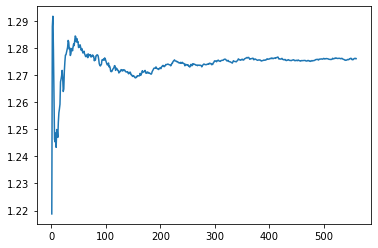

In [73]:
plt.plot([i for i in range(2000)], means_novice)

In [86]:
distance_intra_novice = np.mean(means_novice[300:500])
print(distance_intra_novice)

1.275641302461915


#### Non-novices

In [80]:
df_exp_shuffled = df_exp.sample(frac = 1)
phrases_exp = [df_exp_shuffled.iloc[i]['tokenized_replique'].split(' ') for i in range(2 * 2000)]

In [82]:
WMD_exp = [w2v_model_exp.wmdistance(phrases_exp[i], phrases_exp[i + 1]) for i in range(0, 4000, 2)]

<ipython-input-82-8ca24bd417e6>:1: DeprecationWarning: Call to deprecated `wmdistance` (Method will be removed in 4.0.0, use self.wv.wmdistance() instead).
  WMD_exp = [w2v_model_exp.wmdistance(phrases_exp[i], phrases_exp[i + 1]) for i in range(0, 4000, 2)]
2021-02-22 10:20:16,316 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:16,318 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:16,321 : INFO : built Dictionary(81 unique tokens: ['a', 'affaires', 'agenda', 'ailleurs', 'après']...) from 2 documents (total 94 corpus positions)
2021-02-22 10:20:16,428 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:16,429 : INFO : built Dictionary(46 unique tokens: ['amendement', 'beaune', 'christine', 'mme', 'parole']...) from 2 documents (total 47 corpus positions)
2021-02-22 10:20:16,445 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:16,446 : INFO : built Diction

2021-02-22 10:20:17,087 : INFO : built Dictionary(63 unique tokens: ['amendement', 'avis', 'commission', 'quel', 'a']...) from 2 documents (total 64 corpus positions)
2021-02-22 10:20:17,114 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:17,116 : INFO : built Dictionary(53 unique tokens: ['agricoles', 'ainsi', 'alors', 'aléas', 'améliorer']...) from 2 documents (total 56 corpus positions)
2021-02-22 10:20:17,154 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:17,155 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:17,157 : INFO : built Dictionary(44 unique tokens: ['acquise', 'ambassadeurs', 'autres', 'bien', 'comme']...) from 2 documents (total 45 corpus positions)
2021-02-22 10:20:17,187 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:17,188 : INFO : built Dictionary(21 unique tokens: ['ailleurs', 'assemblée', 'bancs', 'certains', 'cette']...) from

2021-02-22 10:20:17,815 : INFO : built Dictionary(58 unique tokens: ['a', 'ainsi', 'concernent', 'continental', 'fixées']...) from 2 documents (total 65 corpus positions)
2021-02-22 10:20:17,837 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:17,839 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:17,841 : INFO : built Dictionary(38 unique tokens: ['acquisition', 'activités', 'administratif', 'administratifs', 'amendement']...) from 2 documents (total 42 corpus positions)
2021-02-22 10:20:17,852 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:17,853 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:17,854 : INFO : built Dictionary(19 unique tokens: ['assemblée', 'aussi', 'cela', 'cette', 'chasse']...) from 2 documents (total 20 corpus positions)
2021-02-22 10:20:17,861 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
20

2021-02-22 10:20:18,398 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:18,400 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:18,401 : INFO : built Dictionary(64 unique tokens: ['agence', 'agents', 'alimentaire', 'alimentaires', 'allocation']...) from 2 documents (total 69 corpus positions)
2021-02-22 10:20:18,440 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:18,441 : INFO : built Dictionary(62 unique tokens: ['conservation', 'couvrir', 'dispositif', 'entreprises', 'envisager']...) from 2 documents (total 76 corpus positions)
2021-02-22 10:20:18,486 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:18,487 : INFO : built Dictionary(5 unique tokens: ['protocole', 'authentiques', 'compris', 'démocrates', 'parmi']) from 2 documents (total 5 corpus positions)
2021-02-22 10:20:18,488 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-2

2021-02-22 10:20:19,219 : INFO : built Dictionary(95 unique tokens: ['a', 'ailleurs', 'amendement', 'applique', 'apportée']...) from 2 documents (total 110 corpus positions)
2021-02-22 10:20:19,336 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:19,337 : INFO : built Dictionary(47 unique tokens: ['a', 'an', 'bien', 'budget', 'cacher']...) from 2 documents (total 50 corpus positions)
2021-02-22 10:20:19,366 : INFO : Removed 1 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:19,367 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:19,368 : INFO : built Dictionary(89 unique tokens: ['accéder', 'ailleurs', 'cette', 'ceux', 'chacun']...) from 2 documents (total 111 corpus positions)
2021-02-22 10:20:19,439 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:19,440 : INFO : built Dictionary(6 unique tokens: ['accusez', 'avoir', 'plan', 'voté', 'amendement']...) from 2 documents (to

2021-02-22 10:20:20,084 : INFO : built Dictionary(16 unique tokens: ['avis', 'commission', 'quel', 'allemagne', 'autorisation']...) from 2 documents (total 19 corpus positions)
2021-02-22 10:20:20,094 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:20,096 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:20,097 : INFO : built Dictionary(51 unique tokens: ['a', 'bien', 'bon', 'cariou', 'comme']...) from 2 documents (total 56 corpus positions)
2021-02-22 10:20:20,137 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:20,138 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:20,140 : INFO : built Dictionary(64 unique tokens: ['agissant', 'amont', 'arbitrage', 'bien', 'budgets']...) from 2 documents (total 69 corpus positions)
2021-02-22 10:20:20,219 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:20,220 : INFO

2021-02-22 10:20:21,009 : INFO : built Dictionary(4 unique tokens: ['travailler', 'voulez', 'eh', 'oui']) from 2 documents (total 4 corpus positions)
2021-02-22 10:20:21,012 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:21,014 : INFO : built Dictionary(25 unique tokens: ['amendement', 'cet', 'communes', 'dispositif', 'désormais']...) from 2 documents (total 26 corpus positions)
2021-02-22 10:20:21,027 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:21,030 : INFO : built Dictionary(26 unique tokens: ['rien', 'voir', 'ailleurs', 'aller', 'apprendre']...) from 2 documents (total 27 corpus positions)
2021-02-22 10:20:21,043 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:21,045 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:21,049 : INFO : built Dictionary(96 unique tokens: ['a', 'activité', 'agir', 'agissant', 'bonne']...) from 2 documents (total 105

2021-02-22 10:20:22,020 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:22,022 : INFO : built Dictionary(57 unique tokens: ['accompli', 'affaires', 'amérique', 'arbitrage', 'autant']...) from 2 documents (total 60 corpus positions)
2021-02-22 10:20:22,037 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:22,039 : INFO : built Dictionary(11 unique tokens: ['amendement', 'cet', 'rapporteure', 'rédactionnel', 'également']...) from 2 documents (total 11 corpus positions)
2021-02-22 10:20:22,043 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:22,045 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:22,050 : INFO : built Dictionary(28 unique tokens: ['spécialiste', 'ailleurs', 'aller', 'aucune', 'autorité']...) from 2 documents (total 28 corpus positions)
2021-02-22 10:20:22,056 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-2

2021-02-22 10:20:23,019 : INFO : built Dictionary(26 unique tokens: ['loi', 'militaire', 'peut', 'programmation', 'prévoyait']...) from 2 documents (total 26 corpus positions)
2021-02-22 10:20:23,026 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:23,030 : INFO : built Dictionary(11 unique tokens: ['bref', 'certes', 'fait', 'impression', 'modifié']...) from 2 documents (total 11 corpus positions)
2021-02-22 10:20:23,033 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:23,035 : INFO : built Dictionary(47 unique tokens: ['accord', 'aménagement', 'ans', 'attentive', 'avertis']...) from 2 documents (total 48 corpus positions)
2021-02-22 10:20:23,071 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:23,075 : INFO : built Dictionary(20 unique tokens: ['bientôt', 'tour', 'a', 'après', 'autres']...) from 2 documents (total 20 corpus positions)
2021-02-22 10:20:23,082 : INFO : Removed 0 and 2 OOV words 

2021-02-22 10:20:24,078 : INFO : built Dictionary(29 unique tokens: ['article', 'code', 'demandons', 'droits', 'entérine']...) from 2 documents (total 29 corpus positions)
2021-02-22 10:20:24,090 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:24,099 : INFO : built Dictionary(47 unique tokens: ['aide', 'allez', 'année', 'comptez', 'constituer']...) from 2 documents (total 50 corpus positions)
2021-02-22 10:20:24,127 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:24,135 : INFO : built Dictionary(27 unique tokens: ['ambitieux', 'auteurs', 'beaucoup', 'cela', 'cherche']...) from 2 documents (total 27 corpus positions)
2021-02-22 10:20:24,140 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:24,143 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:24,149 : INFO : built Dictionary(51 unique tokens: ['années', 'attentes', 'beaucoup', 'besoins', 'cas']...) fro

2021-02-22 10:20:24,868 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:24,875 : INFO : built Dictionary(53 unique tokens: ['accompagnement', 'adoptant', 'aide', 'amendement', 'associations']...) from 2 documents (total 59 corpus positions)
2021-02-22 10:20:24,938 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:24,939 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:24,940 : INFO : built Dictionary(45 unique tokens: ['a', 'abord', 'articles', 'bien', 'cette']...) from 2 documents (total 52 corpus positions)
2021-02-22 10:20:24,965 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:24,967 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:24,969 : INFO : built Dictionary(72 unique tokens: ['alpha', 'apparente', 'bienvenue', 'cela', 'certes']...) from 2 documents (total 79 corpus positions)
2021-02-22 10:20:25,059 : I

2021-02-22 10:20:25,721 : INFO : built Dictionary(48 unique tokens: ['adresse', 'aggraver', 'aides', 'aussi', 'ceux']...) from 2 documents (total 51 corpus positions)
2021-02-22 10:20:25,754 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:25,755 : INFO : built Dictionary(18 unique tokens: ['apparentés', 'apportera', 'démocrate', 'groupe', 'mesures']...) from 2 documents (total 18 corpus positions)
2021-02-22 10:20:25,760 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:25,761 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:25,763 : INFO : built Dictionary(43 unique tokens: ['brigitte', 'kuster', 'mme', 'parole', 'a']...) from 2 documents (total 48 corpus positions)
2021-02-22 10:20:25,772 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:25,775 : INFO : built Dictionary(4 unique tokens: ['avis', 'gouvernement', 'quel', 'ambitieux']) from 2 documents (to

2021-02-22 10:20:26,268 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:26,270 : INFO : built Dictionary(52 unique tokens: ['a', 'adapter', 'afin', 'assumée', 'battue']...) from 2 documents (total 62 corpus positions)
2021-02-22 10:20:26,278 : INFO : Removed 0 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:26,281 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:26,283 : INFO : built Dictionary(68 unique tokens: ['exactement', 'abord', 'actions', 'affirmait', 'allemande']...) from 2 documents (total 78 corpus positions)
2021-02-22 10:20:26,294 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:26,297 : INFO : built Dictionary(54 unique tokens: ['a', 'affaire', 'ailleurs', 'appelé', 'après']...) from 2 documents (total 65 corpus positions)
2021-02-22 10:20:26,304 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:26,306 : INFO : built Dictionary

2021-02-22 10:20:26,872 : INFO : built Dictionary(36 unique tokens: ['eh', 'oui', 'agriculteurs', 'aides', 'ailleurs']...) from 2 documents (total 36 corpus positions)
2021-02-22 10:20:26,882 : INFO : Removed 1 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:26,884 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:26,886 : INFO : built Dictionary(74 unique tokens: ['abandon', 'apporter', 'après', 'chaque', 'comment']...) from 2 documents (total 85 corpus positions)
2021-02-22 10:20:26,955 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:26,956 : INFO : built Dictionary(22 unique tokens: ['cas', 'clinique', 'ferme', 'attractive', 'depuis']...) from 2 documents (total 22 corpus positions)
2021-02-22 10:20:26,959 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:26,961 : INFO : built Dictionary(65 unique tokens: ['actualité', 'attal', 'autres', 'avant', 'bien']...) from 2 docu

2021-02-22 10:20:27,704 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:27,714 : INFO : built Dictionary(51 unique tokens: ['alsace', 'ans', 'application', 'arrière', 'bat']...) from 2 documents (total 53 corpus positions)
2021-02-22 10:20:27,763 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:27,765 : INFO : built Dictionary(14 unique tokens: ['article', 'castellani', 'inscrit', 'michel', 'parole']...) from 2 documents (total 14 corpus positions)
2021-02-22 10:20:27,782 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:27,791 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:27,794 : INFO : built Dictionary(66 unique tokens: ['amendement', 'apporte', 'bénéficient', 'cet', 'confusion']...) from 2 documents (total 70 corpus positions)
2021-02-22 10:20:27,889 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:27,897 : INFO : bu

2021-02-22 10:20:28,844 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:28,848 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:28,850 : INFO : built Dictionary(33 unique tokens: ['avancées', 'comporte', 'compromis', 'concrètes', 'néanmoins']...) from 2 documents (total 34 corpus positions)
2021-02-22 10:20:28,868 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:28,870 : INFO : built Dictionary(5 unique tokens: ['bien', 'très', 'avis', 'gouvernement', 'quel']) from 2 documents (total 5 corpus positions)
2021-02-22 10:20:28,872 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:28,874 : INFO : built Dictionary(28 unique tokens: ['absence', 'accords', 'certains', 'cinquante', 'collectifs']...) from 2 documents (total 37 corpus positions)
2021-02-22 10:20:28,884 : INFO : Removed 2 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:28,886 

2021-02-22 10:20:29,565 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:29,566 : INFO : built Dictionary(81 unique tokens: ['groupe', 'kerlogot', 'marche', 'parole', 'république']...) from 2 documents (total 89 corpus positions)
2021-02-22 10:20:29,589 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:29,591 : INFO : built Dictionary(6 unique tokens: ['intérieur', 'ministre', 'parole', 'état', 'reprise']...) from 2 documents (total 7 corpus positions)
2021-02-22 10:20:29,594 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:29,599 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:29,601 : INFO : built Dictionary(78 unique tokens: ['avenir', 'bien', 'comme', 'compétence', 'enfin']...) from 2 documents (total 88 corpus positions)
2021-02-22 10:20:29,716 : INFO : Removed 0 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:29,719 : INFO : 

2021-02-22 10:20:30,773 : INFO : Removed 1 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:30,774 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:30,776 : INFO : built Dictionary(36 unique tokens: ['celles', 'celui', 'concernées', 'elles', 'font']...) from 2 documents (total 37 corpus positions)
2021-02-22 10:20:30,799 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:30,802 : INFO : built Dictionary(19 unique tokens: ['amendements', 'avant', 'emmanuelle', 'identiques', 'mme']...) from 2 documents (total 20 corpus positions)
2021-02-22 10:20:30,809 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:30,813 : INFO : built Dictionary(3 unique tokens: ['fait', 'tout', 'alors']) from 2 documents (total 3 corpus positions)
2021-02-22 10:20:30,815 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:30,818 : INFO : built Dictionary(16 unique tokens: ['do

2021-02-22 10:20:31,549 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:31,551 : INFO : built Dictionary(23 unique tokens: ['grand', 'mépriser', 'peuple', 'rapporteur', 'tort']...) from 2 documents (total 23 corpus positions)
2021-02-22 10:20:31,561 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:31,567 : INFO : built Dictionary(7 unique tokens: ['monsieur', 'président', 'retrouve', 'toute', 'urbanité']...) from 2 documents (total 7 corpus positions)
2021-02-22 10:20:31,580 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:31,582 : INFO : built Dictionary(38 unique tokens: ['apprécier', 'difficulté', 'doit', 'dès', 'façon']...) from 2 documents (total 38 corpus positions)
2021-02-22 10:20:31,606 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:31,607 : INFO : built Dictionary(5 unique tokens: ['défavorable', 'rapporteure', 'amendement', 'mets', 'voix']) from 2 do

2021-02-22 10:20:32,681 : INFO : built Dictionary(22 unique tokens: ['résultat', 'scrutin', 'voici', 'an', 'après']...) from 2 documents (total 22 corpus positions)
2021-02-22 10:20:32,688 : INFO : Removed 1 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:32,691 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:32,692 : INFO : built Dictionary(62 unique tokens: ['ans', 'atteint', 'attribuent', 'autant', 'cartes']...) from 2 documents (total 67 corpus positions)
2021-02-22 10:20:32,763 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:32,773 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:32,775 : INFO : built Dictionary(25 unique tokens: ['aussi', 'base', 'conflit', 'djibouti', 'fait']...) from 2 documents (total 25 corpus positions)
2021-02-22 10:20:32,831 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:32,833 : INFO : built Dicti

2021-02-22 10:20:33,473 : INFO : built Dictionary(29 unique tokens: ['aborder', 'aboutir', 'apparaître', 'applaudissements', 'autour']...) from 2 documents (total 29 corpus positions)
2021-02-22 10:20:33,511 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:33,513 : INFO : built Dictionary(13 unique tokens: ['avis', 'défavorable', 'calendrier', 'exonération', 'favorable']...) from 2 documents (total 13 corpus positions)
2021-02-22 10:20:33,517 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:33,520 : INFO : built Dictionary(73 unique tokens: ['a', 'amendement', 'cet', 'commission', 'rejeté']...) from 2 documents (total 82 corpus positions)
2021-02-22 10:20:33,556 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:33,560 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:33,562 : INFO : built Dictionary(73 unique tokens: ['accidents', 'agence', 'certes', 'cett

2021-02-22 10:20:35,214 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:35,216 : INFO : built Dictionary(44 unique tokens: ['abolir', 'arrêter', 'consommateur', 'distributeur', 'faut']...) from 2 documents (total 49 corpus positions)
2021-02-22 10:20:35,244 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:35,245 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:35,247 : INFO : built Dictionary(101 unique tokens: ['agents', 'ainsi', 'apparaît', 'appelle', 'atteints']...) from 2 documents (total 119 corpus positions)
2021-02-22 10:20:35,314 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:35,315 : INFO : built Dictionary(9 unique tokens: ['monsieur', 'parole', 'président', 'refuser', 'train']...) from 2 documents (total 10 corpus positions)
2021-02-22 10:20:35,318 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:35,

2021-02-22 10:20:36,519 : INFO : built Dictionary(61 unique tokens: ['a', 'accorde', 'assume', 'cavalier', 'chacun']...) from 2 documents (total 68 corpus positions)
2021-02-22 10:20:36,561 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:36,562 : INFO : built Dictionary(22 unique tokens: ['abord', 'agissant', 'amont', 'définir', 'faire']...) from 2 documents (total 23 corpus positions)
2021-02-22 10:20:36,569 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:36,570 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:36,571 : INFO : built Dictionary(62 unique tokens: ['accepter', 'adopté', 'arrière', 'avancée', 'centrales']...) from 2 documents (total 66 corpus positions)
2021-02-22 10:20:36,624 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:36,626 : INFO : built Dictionary(39 unique tokens: ['après', 'assemblée', 'assez', 'beaucoup', 'bien']...) from 2 do

2021-02-22 10:20:37,532 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:37,542 : INFO : built Dictionary(28 unique tokens: ['dire', 'examen', 'générale', 'inscrit', 'instauration']...) from 2 documents (total 28 corpus positions)
2021-02-22 10:20:37,568 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:37,570 : INFO : built Dictionary(8 unique tokens: ['celui', 'comme', 'dommage', 'encore', 'là']...) from 2 documents (total 8 corpus positions)
2021-02-22 10:20:37,580 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:37,584 : INFO : built Dictionary(6 unique tokens: ['black', 'blocs', 'actuelle', 'alinéa', 'article']...) from 2 documents (total 6 corpus positions)
2021-02-22 10:20:37,586 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:37,589 : INFO : built Dictionary(25 unique tokens: ['alinéa', 'amendement', 'réécrire', 'tend', 'application']...) from 2 documents 

2021-02-22 10:20:38,826 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:38,829 : INFO : built Dictionary(40 unique tokens: ['a', 'adoption', 'amendement', 'amendements', 'article']...) from 2 documents (total 41 corpus positions)
2021-02-22 10:20:38,875 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:38,889 : INFO : built Dictionary(30 unique tokens: ['a', 'agenda', 'certaines', 'concurrent', 'constructifs']...) from 2 documents (total 30 corpus positions)
2021-02-22 10:20:38,972 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:38,975 : INFO : built Dictionary(34 unique tokens: ['avis', 'gouvernement', 'quel', 'adversaires', 'alerte']...) from 2 documents (total 37 corpus positions)
2021-02-22 10:20:38,987 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:38,990 : INFO : built Dictionary(18 unique tokens: ['jérôme', 'nury', 'parole', 'aboutira', 'celle']...) from

2021-02-22 10:20:39,639 : INFO : Removed 3 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:39,640 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:39,642 : INFO : built Dictionary(74 unique tokens: ['alternatives', 'arrêt', 'assume', 'aucun', 'centre']...) from 2 documents (total 80 corpus positions)
2021-02-22 10:20:39,701 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:39,702 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:39,704 : INFO : built Dictionary(85 unique tokens: ['affaires', 'angoulême', 'bassin', 'besoin', 'cela']...) from 2 documents (total 93 corpus positions)
2021-02-22 10:20:39,788 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:39,789 : INFO : built Dictionary(6 unique tokens: ['finances', 'ministre', 'parole', 'économie', 'idéaliste']...) from 2 documents (total 6 corpus positions)
2021-02-22 10:20:39,790 : I

2021-02-22 10:20:40,779 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:40,782 : INFO : built Dictionary(48 unique tokens: ['agit', 'amendement', 'audition', 'cet', 'chercheurs']...) from 2 documents (total 53 corpus positions)
2021-02-22 10:20:40,809 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:40,810 : INFO : built Dictionary(25 unique tokens: ['agit', 'année', 'constater', 'cpf', 'dernière']...) from 2 documents (total 25 corpus positions)
2021-02-22 10:20:40,817 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:40,818 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:40,819 : INFO : built Dictionary(44 unique tokens: ['boissons', 'consommateurs', 'continuer', 'dispositif', 'déchets']...) from 2 documents (total 49 corpus positions)
2021-02-22 10:20:40,840 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:40,840 : INFO

2021-02-22 10:20:42,009 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:42,011 : INFO : built Dictionary(66 unique tokens: ['achat', 'augmentent', 'autrement', 'autres', 'baisse']...) from 2 documents (total 78 corpus positions)
2021-02-22 10:20:42,111 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:42,113 : INFO : built Dictionary(68 unique tokens: ['accéder', 'acteurs', 'amendement', 'auprès', 'avocats']...) from 2 documents (total 75 corpus positions)
2021-02-22 10:20:42,190 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:42,192 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:42,194 : INFO : built Dictionary(42 unique tokens: ['ailleurs', 'allés', 'amendement', 'ami', 'appliquer']...) from 2 documents (total 45 corpus positions)
2021-02-22 10:20:42,208 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:42,210

2021-02-22 10:20:43,407 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:43,408 : INFO : built Dictionary(74 unique tokens: ['activité', 'amendement', 'apprécier', 'cadre', 'cet']...) from 2 documents (total 80 corpus positions)
2021-02-22 10:20:43,479 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:43,538 : INFO : built Dictionary(17 unique tokens: ['accomplissent', 'ainsi', 'beau', 'capacités', 'ceux']...) from 2 documents (total 17 corpus positions)
2021-02-22 10:20:43,569 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:43,607 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:43,609 : INFO : built Dictionary(59 unique tokens: ['après', 'ceux', 'crise', 'droit', 'emmanuel']...) from 2 documents (total 68 corpus positions)
2021-02-22 10:20:43,665 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:43,669 : INFO : a

2021-02-22 10:20:44,578 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:44,580 : INFO : built Dictionary(32 unique tokens: ['adopté', 'amendement', 'cadre', 'censuré', 'cette']...) from 2 documents (total 33 corpus positions)
2021-02-22 10:20:44,588 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:44,590 : INFO : built Dictionary(21 unique tokens: ['arrêtez', 'donner', 'faites', 'multinationales', 'permis']...) from 2 documents (total 21 corpus positions)
2021-02-22 10:20:44,597 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:44,598 : INFO : built Dictionary(22 unique tokens: ['a', 'après', 'aussi', 'battent', 'carburants']...) from 2 documents (total 23 corpus positions)
2021-02-22 10:20:44,602 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:44,603 : INFO : built Dictionary(53 unique tokens: ['accompagnement', 'achever', 'aider', 'apprenti', 'article']...) fro

2021-02-22 10:20:45,407 : INFO : built Dictionary(22 unique tokens: ['hum', 'capable', 'dire', 'dites', 'donc']...) from 2 documents (total 24 corpus positions)
2021-02-22 10:20:45,413 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:45,415 : INFO : built Dictionary(56 unique tokens: ['annoncées', 'assure', 'bien', 'cadre', 'cela']...) from 2 documents (total 63 corpus positions)
2021-02-22 10:20:45,455 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:45,456 : INFO : built Dictionary(42 unique tokens: ['amendement', 'delà', 'donc', 'dons', 'duquel']...) from 2 documents (total 42 corpus positions)
2021-02-22 10:20:45,507 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:45,524 : INFO : built Dictionary(17 unique tokens: ['accès', 'assemblée', 'avantages', 'badge', 'bénéficiait']...) from 2 documents (total 17 corpus positions)
2021-02-22 10:20:45,534 : INFO : adding document #0 to Dictionary(0 u

2021-02-22 10:20:46,791 : INFO : built Dictionary(21 unique tokens: ['chêne', 'comptez', 'développement', 'favoriser', 'filière']...) from 2 documents (total 21 corpus positions)
2021-02-22 10:20:46,795 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:46,798 : INFO : built Dictionary(41 unique tokens: ['effet', 'reparlerons', 'a', 'adoptées', 'batterie']...) from 2 documents (total 49 corpus positions)
2021-02-22 10:20:46,807 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:46,813 : INFO : built Dictionary(3 unique tokens: ['pédagogique', 'très', 'communiste']) from 2 documents (total 3 corpus positions)
2021-02-22 10:20:46,817 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:46,818 : INFO : built Dictionary(33 unique tokens: ['a', 'agir', 'ainsi', 'approuve', 'article']...) from 2 documents (total 33 corpus positions)
2021-02-22 10:20:46,824 : INFO : adding document #0 to Dictionary(0 unique t

2021-02-22 10:20:48,384 : INFO : built Dictionary(44 unique tokens: ['allez', 'aussi', 'autre', 'centre', 'certains']...) from 2 documents (total 45 corpus positions)
2021-02-22 10:20:48,404 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:48,407 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:48,409 : INFO : built Dictionary(25 unique tokens: ['assemblée', 'chaque', 'débat', 'francophonie', 'nationale']...) from 2 documents (total 25 corpus positions)
2021-02-22 10:20:48,424 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:48,426 : INFO : built Dictionary(26 unique tokens: ['annie', 'genevard', 'groupe', 'mme', 'parole']...) from 2 documents (total 28 corpus positions)
2021-02-22 10:20:48,441 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:48,443 : INFO : built Dictionary(63 unique tokens: ['a', 'ainsi', 'années', 'cessé', 'devenu']...) from 2 documen

2021-02-22 10:20:49,642 : INFO : built Dictionary(51 unique tokens: ['administration', 'assistants', 'avoir', 'combler', 'compétences']...) from 2 documents (total 56 corpus positions)
2021-02-22 10:20:49,682 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:49,685 : INFO : built Dictionary(29 unique tokens: ['avis', 'cas', 'décision', 'fera', 'ni']...) from 2 documents (total 31 corpus positions)
2021-02-22 10:20:49,694 : INFO : Removed 3 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:49,697 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:49,698 : INFO : built Dictionary(50 unique tokens: ['agriculteur', 'animaux', 'assurer', 'astreinte', 'besoin']...) from 2 documents (total 52 corpus positions)
2021-02-22 10:20:49,731 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:49,734 : INFO : built Dictionary(40 unique tokens: ['centres', 'clients', 'commerce', 'commerçants', 'c

2021-02-22 10:20:50,677 : INFO : built Dictionary(56 unique tokens: ['non', 'a', 'abandon', 'alimentaires', 'allocations']...) from 2 documents (total 57 corpus positions)
2021-02-22 10:20:50,682 : INFO : Removed 0 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:50,683 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:50,685 : INFO : built Dictionary(58 unique tokens: ['ceux', 'disent', 'europe', 'européens', 'mépris']...) from 2 documents (total 65 corpus positions)
2021-02-22 10:20:50,710 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:50,712 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:50,713 : INFO : built Dictionary(31 unique tokens: ['fillon', 'justice', 'programme', 'relisez', 'accueil']...) from 2 documents (total 31 corpus positions)
2021-02-22 10:20:50,720 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:50,721 : INFO

2021-02-22 10:20:51,763 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:51,766 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:51,769 : INFO : built Dictionary(58 unique tokens: ['annulation', 'bien', 'demandés', 'déboucheront', 'financer']...) from 2 documents (total 63 corpus positions)
2021-02-22 10:20:51,799 : INFO : Removed 0 and 4 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:51,800 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:51,801 : INFO : built Dictionary(44 unique tokens: ['ajoute', 'aussi', 'choc', 'collègues', 'déjà']...) from 2 documents (total 48 corpus positions)
2021-02-22 10:20:51,835 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:51,842 : INFO : built Dictionary(41 unique tokens: ['amendement', 'où', 'écrit', 'agit', 'ailleurs']...) from 2 documents (total 46 corpus positions)
2021-02-22 10:20:51,853 : INFO :

2021-02-22 10:20:52,895 : INFO : Removed 0 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:52,897 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:52,906 : INFO : built Dictionary(39 unique tokens: ['amitié', 'bonheur', 'merci', 'monsieur', 'président']...) from 2 documents (total 43 corpus positions)
2021-02-22 10:20:52,925 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:52,932 : INFO : built Dictionary(44 unique tokens: ['après', 'bien', 'ceux', 'concerter', 'demander']...) from 2 documents (total 47 corpus positions)
2021-02-22 10:20:52,961 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:52,967 : INFO : built Dictionary(10 unique tokens: ['bricout', 'jean', 'louis', 'parole', 'bravo']...) from 2 documents (total 10 corpus positions)
2021-02-22 10:20:52,971 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:52,973 : INFO : adding

2021-02-22 10:20:53,702 : INFO : built Dictionary(21 unique tokens: ['acteurs', 'amis', 'argent', 'cice', 'compétitivité']...) from 2 documents (total 22 corpus positions)
2021-02-22 10:20:53,707 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:53,710 : INFO : built Dictionary(26 unique tokens: ['bien', 'très', 'affaires', 'ambiance', 'avancer']...) from 2 documents (total 33 corpus positions)
2021-02-22 10:20:53,715 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:53,717 : INFO : built Dictionary(106 unique tokens: ['a', 'apercevoir', 'auditions', 'cela', 'celles']...) from 2 documents (total 127 corpus positions)
2021-02-22 10:20:53,913 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:53,915 : INFO : built Dictionary(47 unique tokens: ['algorithmiques', 'assurer', 'aussi', 'automatisés', 'cas']...) from 2 documents (total 48 corpus positions)
2021-02-22 10:20:53,974 : INFO : adding document #

2021-02-22 10:20:55,017 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:55,020 : INFO : built Dictionary(14 unique tokens: ['agissant', 'aucune', 'conservateurs', 'couple', 'dérision']...) from 2 documents (total 14 corpus positions)
2021-02-22 10:20:55,027 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:55,029 : INFO : built Dictionary(39 unique tokens: ['afférents', 'allocation', 'assez', 'besoins', 'comme']...) from 2 documents (total 41 corpus positions)
2021-02-22 10:20:55,047 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:55,050 : INFO : built Dictionary(19 unique tokens: ['accords', 'ainsi', 'anses', 'atteindre', 'collectifs']...) from 2 documents (total 20 corpus positions)
2021-02-22 10:20:55,057 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:55,061 : INFO : built Dictionary(13 unique tokens: ['appelle', 'gouvernement', 'jour', 'ordre', 'questions']

2021-02-22 10:20:56,027 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:56,028 : INFO : built Dictionary(45 unique tokens: ['a', 'accompagnement', 'assumez', 'clairement', 'contrairement']...) from 2 documents (total 47 corpus positions)
2021-02-22 10:20:56,049 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:56,052 : INFO : built Dictionary(14 unique tokens: ['défendu', 'celui', 'déchéance', 'gouvernement', 'majorité']...) from 2 documents (total 14 corpus positions)
2021-02-22 10:20:56,055 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:56,061 : INFO : built Dictionary(54 unique tokens: ['attentifs', 'car', 'chacun', 'chers', 'cinquième']...) from 2 documents (total 56 corpus positions)
2021-02-22 10:20:56,093 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:56,095 : INFO : built Dictionary(16 unique tokens: ['arrive', 'maintenant', 'raison', 'voix', 'bras']..

2021-02-22 10:20:57,611 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:57,614 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:57,616 : INFO : built Dictionary(46 unique tokens: ['agir', 'ailleurs', 'apportent', 'aucune', 'autant']...) from 2 documents (total 48 corpus positions)
2021-02-22 10:20:57,625 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:20:57,626 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:57,627 : INFO : built Dictionary(43 unique tokens: ['a', 'aimerais', 'ans', 'autres', 'chargé']...) from 2 documents (total 47 corpus positions)
2021-02-22 10:20:57,650 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:57,652 : INFO : built Dictionary(54 unique tokens: ['accès', 'acteurs', 'agence', 'associe', 'attendue']...) from 2 documents (total 62 corpus positions)
2021-02-22 10:20:57,681 : INFO : adding d

2021-02-22 10:20:58,340 : INFO : built Dictionary(38 unique tokens: ['droit', 'fait', 'travail', 'admettons', 'alloués']...) from 2 documents (total 41 corpus positions)
2021-02-22 10:20:58,345 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:58,347 : INFO : built Dictionary(47 unique tokens: ['agit', 'dispositif', 'donc', 'question', 'réalité']...) from 2 documents (total 49 corpus positions)
2021-02-22 10:20:58,356 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:58,357 : INFO : built Dictionary(18 unique tokens: ['amendements', 'article', 'avis', 'commission', 'constitution']...) from 2 documents (total 18 corpus positions)
2021-02-22 10:20:58,360 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:58,362 : INFO : built Dictionary(31 unique tokens: ['défendu', 'abordé', 'abordés', 'assure', 'cours']...) from 2 documents (total 31 corpus positions)
2021-02-22 10:20:58,365 : INFO : adding documen

2021-02-22 10:20:59,042 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:59,065 : INFO : built Dictionary(32 unique tokens: ['adaptées', 'ainsi', 'amendement', 'assurent', 'caractérisées']...) from 2 documents (total 32 corpus positions)
2021-02-22 10:20:59,099 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:59,116 : INFO : built Dictionary(26 unique tokens: ['essentielles', 'questions', 'actes', 'constitue', 'contraire']...) from 2 documents (total 26 corpus positions)
2021-02-22 10:20:59,157 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:59,172 : INFO : built Dictionary(15 unique tokens: ['a', 'bien', 'cette', 'direction', 'dirons']...) from 2 documents (total 16 corpus positions)
2021-02-22 10:20:59,190 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:20:59,215 : INFO : built Dictionary(11 unique tokens: ['défendu', 'amendement', 'cet', 'cours', 'création']...)

2021-02-22 10:21:00,144 : INFO : Removed 0 and 4 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:00,147 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:00,150 : INFO : built Dictionary(78 unique tokens: ['défendu', 'absence', 'accords', 'administré', 'algérie']...) from 2 documents (total 87 corpus positions)
2021-02-22 10:21:00,161 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:00,163 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:00,164 : INFO : built Dictionary(60 unique tokens: ['abaisser', 'action', 'centre', 'chose', 'citoyen']...) from 2 documents (total 61 corpus positions)
2021-02-22 10:21:00,248 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:00,250 : INFO : built Dictionary(18 unique tokens: ['attends', 'réponse', 'secrétaire', 'état', 'accompagner']...) from 2 documents (total 18 corpus positions)
2021-02-22 10:21:00,25

2021-02-22 10:21:01,458 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:01,459 : INFO : built Dictionary(2 unique tokens: ['amendements', 'arriveront']) from 2 documents (total 2 corpus positions)
2021-02-22 10:21:01,463 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:01,464 : INFO : built Dictionary(77 unique tokens: ['antilles', 'arrivée', 'bateau', 'bateaux', 'car']...) from 2 documents (total 83 corpus positions)
2021-02-22 10:21:01,550 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:01,567 : INFO : built Dictionary(29 unique tokens: ['avis', 'gouvernement', 'quel', 'adresse', 'continuent']...) from 2 documents (total 29 corpus positions)
2021-02-22 10:21:01,573 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:01,575 : INFO : built Dictionary(15 unique tokens: ['associé', 'avoir', 'deuxième', 'dominique', 'dont']...) from 2 documents (total 15 corpus positi

2021-02-22 10:21:02,188 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:02,190 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:02,191 : INFO : built Dictionary(38 unique tokens: ['ceta', 'a', 'aires', 'aussi', 'avis']...) from 2 documents (total 40 corpus positions)
2021-02-22 10:21:02,197 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:02,199 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:02,200 : INFO : built Dictionary(46 unique tokens: ['addition', 'ajustement', 'besoin', 'bénéficient', 'bénéficier']...) from 2 documents (total 58 corpus positions)
2021-02-22 10:21:02,209 : INFO : Removed 0 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:02,210 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:02,211 : INFO : built Dictionary(45 unique tokens: ['mise', 'parlement', 'sous', 'tutelle',

2021-02-22 10:21:02,755 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:02,756 : INFO : built Dictionary(96 unique tokens: ['a', 'accompagner', 'actionnariat', 'adéquat', 'ainsi']...) from 2 documents (total 104 corpus positions)
2021-02-22 10:21:02,841 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:02,844 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:02,851 : INFO : built Dictionary(36 unique tokens: ['a', 'aussi', 'bazin', 'beaucoup', 'besoin']...) from 2 documents (total 40 corpus positions)
2021-02-22 10:21:02,858 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:02,859 : INFO : built Dictionary(61 unique tokens: ['ici', 'laissée', 'seule', 'toute', 'vrai']...) from 2 documents (total 71 corpus positions)
2021-02-22 10:21:02,877 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:02,879 : INFO : built Dictionary(48 un

2021-02-22 10:21:03,771 : INFO : built Dictionary(80 unique tokens: ['acteurs', 'adoptée', 'ailleurs', 'ainsi', 'aller']...) from 2 documents (total 83 corpus positions)
2021-02-22 10:21:03,811 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:03,812 : INFO : built Dictionary(8 unique tokens: ['défendu', 'croyons', 'enthousiasme', 'france', 'opposons']...) from 2 documents (total 8 corpus positions)
2021-02-22 10:21:03,815 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:03,817 : INFO : built Dictionary(40 unique tokens: ['avis', 'comité', 'comme', 'commission', 'défavorable']...) from 2 documents (total 40 corpus positions)
2021-02-22 10:21:03,828 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:03,829 : INFO : built Dictionary(37 unique tokens: ['impôts', 'paie', 'quand', 'aboutira', 'agissant']...) from 2 documents (total 41 corpus positions)
2021-02-22 10:21:03,835 : INFO : adding document #

2021-02-22 10:21:04,512 : INFO : built Dictionary(27 unique tokens: ['a', 'analyses', 'bénéficier', 'car', 'certificats']...) from 2 documents (total 27 corpus positions)
2021-02-22 10:21:04,518 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:04,519 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:04,524 : INFO : built Dictionary(17 unique tokens: ['accord', 'adapter', 'alinéa', 'base', 'contenu']...) from 2 documents (total 18 corpus positions)
2021-02-22 10:21:04,531 : INFO : Removed 0 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:04,533 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:04,535 : INFO : built Dictionary(50 unique tokens: ['a', 'action', 'agit', 'beaucoup', 'climat']...) from 2 documents (total 57 corpus positions)
2021-02-22 10:21:04,586 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:04,588 : INFO : built Dict

2021-02-22 10:21:05,122 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:05,123 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:05,124 : INFO : built Dictionary(75 unique tokens: ['a', 'amendement', 'avoir', 'banc', 'budgétaire']...) from 2 documents (total 78 corpus positions)
2021-02-22 10:21:05,185 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:05,186 : INFO : built Dictionary(31 unique tokens: ['avancer', 'bien', 'cela', 'devons', 'dit']...) from 2 documents (total 33 corpus positions)
2021-02-22 10:21:05,198 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:05,200 : INFO : built Dictionary(39 unique tokens: ['a', 'accepter', 'agit', 'allons', 'analyse']...) from 2 documents (total 46 corpus positions)
2021-02-22 10:21:05,212 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:05,213 : INFO : built Dictionary(36 unique t

2021-02-22 10:21:06,155 : INFO : built Dictionary(25 unique tokens: ['agit', 'assemblée', 'bien', 'cela', 'cette']...) from 2 documents (total 28 corpus positions)
2021-02-22 10:21:06,160 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:06,164 : INFO : built Dictionary(16 unique tokens: ['a', 'bref', 'bug', 'action', 'agences']...) from 2 documents (total 17 corpus positions)
2021-02-22 10:21:06,169 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:06,171 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:06,175 : INFO : built Dictionary(51 unique tokens: ['agence', 'alimente', 'avoir', 'cet', 'comme']...) from 2 documents (total 54 corpus positions)
2021-02-22 10:21:06,229 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:06,230 : INFO : built Dictionary(41 unique tokens: ['assemblée', 'aveugle', 'celles', 'connaître', 'consenties']...) from 2 documents (to

2021-02-22 10:21:07,185 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:07,188 : INFO : built Dictionary(7 unique tokens: ['chers', 'collègues', 'savez', 'sujet', 'tient']...) from 2 documents (total 7 corpus positions)
2021-02-22 10:21:07,191 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:07,197 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:07,199 : INFO : built Dictionary(8 unique tokens: ['annoncé', 'assemblée', 'enceinte', 'nationale', 'scrutin']...) from 2 documents (total 8 corpus positions)
2021-02-22 10:21:07,208 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:07,210 : INFO : built Dictionary(88 unique tokens: ['acteurs', 'alternance', 'amendement', 'apprentissage', 'cause']...) from 2 documents (total 99 corpus positions)
2021-02-22 10:21:07,309 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:07,3

2021-02-22 10:21:08,384 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:08,385 : INFO : built Dictionary(59 unique tokens: ['a', 'accéder', 'actuel', 'ainsi', 'amendement']...) from 2 documents (total 59 corpus positions)
2021-02-22 10:21:08,425 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:08,435 : INFO : built Dictionary(53 unique tokens: ['agents', 'arbitrages', 'budgétaires', 'confirmés', 'documents']...) from 2 documents (total 57 corpus positions)
2021-02-22 10:21:08,471 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:08,476 : INFO : built Dictionary(31 unique tokens: ['avis', 'gouvernement', 'quel', 'affectation', 'budgétaires']...) from 2 documents (total 34 corpus positions)
2021-02-22 10:21:08,481 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:08,483 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:08,485 :

2021-02-22 10:21:08,998 : INFO : built Dictionary(86 unique tokens: ['a', 'absolument', 'aucune', 'car', 'cas']...) from 2 documents (total 101 corpus positions)
2021-02-22 10:21:09,098 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:09,101 : INFO : built Dictionary(31 unique tokens: ['amendement', 'mme', 'parole', 'secrétaire', 'soutenir']...) from 2 documents (total 35 corpus positions)
2021-02-22 10:21:09,108 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:09,110 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:09,113 : INFO : built Dictionary(35 unique tokens: ['cette', 'exprimer', 'gratitude', 'madame', 'ministre']...) from 2 documents (total 36 corpus positions)
2021-02-22 10:21:09,125 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:09,126 : INFO : built Dictionary(17 unique tokens: ['ayrault', 'faire', 'pu', 'vrai', 'aborder']...) from 2 docume

2021-02-22 10:21:10,126 : INFO : Removed 3 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:10,128 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:10,129 : INFO : built Dictionary(43 unique tokens: ['a', 'abaissement', 'abandonnée', 'affirmer', 'ans']...) from 2 documents (total 46 corpus positions)
2021-02-22 10:21:10,140 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:10,141 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:10,143 : INFO : built Dictionary(36 unique tokens: ['annonce', 'année', 'anticiper', 'budgétaire', 'cas']...) from 2 documents (total 38 corpus positions)
2021-02-22 10:21:10,161 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:10,163 : INFO : built Dictionary(95 unique tokens: ['accord', 'assurer', 'attention', 'avoir', 'bien']...) from 2 documents (total 105 corpus positions)
2021-02-22 10:21:10,307 : INFO :

2021-02-22 10:21:11,619 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:11,622 : INFO : built Dictionary(70 unique tokens: ['accord', 'accès', 'acteurs', 'amélioration', 'associeront']...) from 2 documents (total 76 corpus positions)
2021-02-22 10:21:11,744 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:11,750 : INFO : built Dictionary(39 unique tokens: ['avis', 'faut', 'général', 'quand', 'rapporteur']...) from 2 documents (total 42 corpus positions)
2021-02-22 10:21:11,769 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:11,773 : INFO : built Dictionary(24 unique tokens: ['bien', 'ceux', 'comme', 'commun', 'créerait']...) from 2 documents (total 26 corpus positions)
2021-02-22 10:21:11,782 : INFO : Removed 0 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:11,788 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:11,791 : INFO : built Dict

2021-02-22 10:21:12,480 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:12,482 : INFO : built Dictionary(44 unique tokens: ['accessibilité', 'adaptation', 'article', 'articles', 'autorisations']...) from 2 documents (total 44 corpus positions)
2021-02-22 10:21:12,506 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:12,508 : INFO : built Dictionary(3 unique tokens: ['fait', 'tout', 'vrai']) from 2 documents (total 3 corpus positions)
2021-02-22 10:21:12,509 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:12,511 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:12,512 : INFO : built Dictionary(56 unique tokens: ['amendements', 'deux', 'retire', 'aidés', 'aménagements']...) from 2 documents (total 62 corpus positions)
2021-02-22 10:21:12,525 : INFO : Removed 0 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:12,528 : INFO : adding doc

2021-02-22 10:21:13,528 : INFO : Removed 0 and 3 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:13,529 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:13,530 : INFO : built Dictionary(73 unique tokens: ['faire', 'politiques', 'publiques', 'travail', 'évaluation']...) from 2 documents (total 80 corpus positions)
2021-02-22 10:21:13,546 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:13,547 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:13,549 : INFO : built Dictionary(49 unique tokens: ['avis', 'gouvernement', 'quel', 'acceptable', 'association']...) from 2 documents (total 55 corpus positions)
2021-02-22 10:21:13,575 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:13,578 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:13,581 : INFO : built Dictionary(47 unique tokens: ['amendements', 'avis'

2021-02-22 10:21:14,280 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:14,283 : INFO : built Dictionary(2 unique tokens: ['amendements', 'cause']) from 2 documents (total 2 corpus positions)
2021-02-22 10:21:14,286 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:14,288 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:14,290 : INFO : built Dictionary(42 unique tokens: ['amendement', 'guillaume', 'larrivé', 'parole', 'soutenir']...) from 2 documents (total 44 corpus positions)
2021-02-22 10:21:14,336 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:14,344 : INFO : built Dictionary(37 unique tokens: ['amendement', 'parole', 'peu', 'soutenir', 'stéphane']...) from 2 documents (total 40 corpus positions)
2021-02-22 10:21:14,365 : INFO : Removed 0 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:14,367 : INFO : adding document #0 to Di

2021-02-22 10:21:16,505 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:16,507 : INFO : built Dictionary(5 unique tokens: ['défendu', 'concepts', 'extrêmement', 'flous', 'restent']) from 2 documents (total 5 corpus positions)
2021-02-22 10:21:16,523 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:16,534 : INFO : built Dictionary(41 unique tokens: ['courson', 'déjà', 'général', 'monsieur', 'rapporteur']...) from 2 documents (total 42 corpus positions)
2021-02-22 10:21:16,562 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:16,588 : INFO : built Dictionary(30 unique tokens: ['allons', 'amendement', 'avantages', 'avis', 'cumuler']...) from 2 documents (total 31 corpus positions)
2021-02-22 10:21:16,602 : INFO : Removed 0 and 4 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:16,604 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:16,605 : INFO : bui

2021-02-22 10:21:18,451 : INFO : Removed 0 and 2 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:18,454 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:18,455 : INFO : built Dictionary(48 unique tokens: ['approche', 'cette', 'image', 'indécence', 'quelle']...) from 2 documents (total 54 corpus positions)
2021-02-22 10:21:18,476 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:18,480 : INFO : built Dictionary(27 unique tokens: ['amitiés', 'autant', 'coins', 'continent', 'cultivons']...) from 2 documents (total 28 corpus positions)
2021-02-22 10:21:18,492 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:18,496 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:18,499 : INFO : built Dictionary(29 unique tokens: ['hui', 'islamistes', 'tuent', 'a', 'abstiendra']...) from 2 documents (total 30 corpus positions)
2021-02-22 10:21:18,506 : INFO : 

2021-02-22 10:21:19,250 : INFO : built Dictionary(38 unique tokens: ['action', 'amendement', 'arguments', 'avis', 'certain']...) from 2 documents (total 38 corpus positions)
2021-02-22 10:21:19,265 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:19,267 : INFO : built Dictionary(4 unique tokens: ['quel', 'rapport', 'avis', 'gouvernement']) from 2 documents (total 5 corpus positions)
2021-02-22 10:21:19,269 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:19,271 : INFO : built Dictionary(10 unique tokens: ['article', 'cet', 'dis', 'france', 'go']...) from 2 documents (total 10 corpus positions)
2021-02-22 10:21:19,274 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:19,277 : INFO : built Dictionary(61 unique tokens: ['a', 'an', 'budget', 'chaleur', 'confirmé']...) from 2 documents (total 67 corpus positions)
2021-02-22 10:21:19,321 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respec

2021-02-22 10:21:20,008 : INFO : built Dictionary(85 unique tokens: ['merci', 'ministre', 'monsieur', 'a', 'alors']...) from 2 documents (total 89 corpus positions)
2021-02-22 10:21:20,025 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:20,029 : INFO : built Dictionary(32 unique tokens: ['exactement', 'attaquer', 'auquel', 'certains', 'collective']...) from 2 documents (total 37 corpus positions)
2021-02-22 10:21:20,034 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:20,035 : INFO : built Dictionary(12 unique tokens: ['auprès', 'ministre', 'mme', 'parole', 'santé']...) from 2 documents (total 12 corpus positions)
2021-02-22 10:21:20,038 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:20,040 : INFO : built Dictionary(59 unique tokens: ['a', 'assumer', 'bloqué', 'car', 'celle']...) from 2 documents (total 61 corpus positions)
2021-02-22 10:21:20,083 : INFO : adding document #0 to Dictionary(0 

2021-02-22 10:21:20,759 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:20,761 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:20,763 : INFO : built Dictionary(43 unique tokens: ['a', 'absolument', 'actes', 'agit', 'alors']...) from 2 documents (total 49 corpus positions)
2021-02-22 10:21:20,773 : INFO : Removed 0 and 5 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:20,775 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:20,776 : INFO : built Dictionary(44 unique tokens: ['abord', 'albert', 'appliquer', 'aussi', 'camus']...) from 2 documents (total 46 corpus positions)
2021-02-22 10:21:20,794 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:20,800 : INFO : built Dictionary(46 unique tokens: ['adapté', 'agit', 'ajouter', 'amendement', 'astreintes']...) from 2 documents (total 49 corpus positions)
2021-02-22 10:21:20,824 : INFO : adding

2021-02-22 10:21:22,068 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:22,073 : INFO : built Dictionary(71 unique tokens: ['a', 'annonce', 'arrêt', 'brut', 'certains']...) from 2 documents (total 77 corpus positions)
2021-02-22 10:21:22,135 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:22,141 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:22,158 : INFO : built Dictionary(76 unique tokens: ['a', 'angleterre', 'autorisée', 'biomédecine', 'cellules']...) from 2 documents (total 95 corpus positions)
2021-02-22 10:21:22,233 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:22,238 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:22,240 : INFO : built Dictionary(78 unique tokens: ['agressions', 'amendement', 'cet', 'code', 'conformément']...) from 2 documents (total 82 corpus positions)
2021-02-22 10:21:22,302 : IN

2021-02-22 10:21:23,240 : INFO : built Dictionary(99 unique tokens: ['a', 'alors', 'application', 'bonne', 'chose']...) from 2 documents (total 112 corpus positions)
2021-02-22 10:21:23,393 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:23,395 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:23,396 : INFO : built Dictionary(51 unique tokens: ['a', 'amendement', 'apporter', 'article', 'assure']...) from 2 documents (total 61 corpus positions)
2021-02-22 10:21:23,421 : INFO : Removed 3 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:23,433 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:23,436 : INFO : built Dictionary(47 unique tokens: ['a', 'aussi', 'bras', 'cela', 'ceux']...) from 2 documents (total 52 corpus positions)
2021-02-22 10:21:23,458 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:23,464 : INFO : built Dictionary(39 

2021-02-22 10:21:24,276 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:24,277 : INFO : built Dictionary(11 unique tokens: ['avis', 'défavorable', 'initiative', 'positive', 'relève']...) from 2 documents (total 11 corpus positions)
2021-02-22 10:21:24,292 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:24,295 : INFO : built Dictionary(37 unique tokens: ['amendement', 'saisi', 'administratives', 'amendements', 'aménagement']...) from 2 documents (total 37 corpus positions)
2021-02-22 10:21:24,306 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:24,308 : INFO : built Dictionary(6 unique tokens: ['faites', 'pourtant', 'aussi', 'second', 'tour']...) from 2 documents (total 6 corpus positions)
2021-02-22 10:21:24,310 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:24,312 : INFO : built Dictionary(11 unique tokens: ['cela', 'dit', 'doit', 'majorité', 'membre']...) fr

2021-02-22 10:21:25,195 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:25,200 : INFO : built Dictionary(26 unique tokens: ['amendements', 'général', 'rapporteur', 'rédactionnels', 'amendement']...) from 2 documents (total 27 corpus positions)
2021-02-22 10:21:25,207 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:25,208 : INFO : built Dictionary(5 unique tokens: ['allez', 'faire', 'a', 'politique', 'préféré']) from 2 documents (total 6 corpus positions)
2021-02-22 10:21:25,210 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:25,213 : INFO : built Dictionary(26 unique tokens: ['faire', 'faut', 'opinion', 'pense', 'publique']...) from 2 documents (total 26 corpus positions)
2021-02-22 10:21:25,226 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:25,227 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:25,231 : INFO : built 

2021-02-22 10:21:25,908 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:25,910 : INFO : built Dictionary(31 unique tokens: ['aide', 'amendement', 'appel', 'assemblée', 'créer']...) from 2 documents (total 32 corpus positions)
2021-02-22 10:21:25,920 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:25,921 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:25,922 : INFO : built Dictionary(42 unique tokens: ['amendements', 'avis', 'défaut', 'défavorable', 'propose']...) from 2 documents (total 45 corpus positions)
2021-02-22 10:21:25,937 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:25,938 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:25,939 : INFO : built Dictionary(12 unique tokens: ['oh', 'a', 'djiboutiennes', 'donc', 'examinons']...) from 2 documents (total 12 corpus positions)
2021-02-22 10:21:25,941 : INFO

2021-02-22 10:21:26,824 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:26,825 : INFO : built Dictionary(42 unique tokens: ['ailleurs', 'appelez', 'biais', 'budget', 'budgets']...) from 2 documents (total 43 corpus positions)
2021-02-22 10:21:26,849 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:26,851 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:26,853 : INFO : built Dictionary(10 unique tokens: ['confirmer', 'ministre', 'monsieur', 'politique', 'pouvez']...) from 2 documents (total 10 corpus positions)
2021-02-22 10:21:26,856 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:26,858 : INFO : built Dictionary(73 unique tokens: ['accorder', 'achat', 'activité', 'actuel', 'ainsi']...) from 2 documents (total 80 corpus positions)
2021-02-22 10:21:26,909 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:26,910 : 

2021-02-22 10:21:27,563 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:27,567 : INFO : built Dictionary(19 unique tokens: ['cela', 'ici', 'incroyable', 'question', 'amendement']...) from 2 documents (total 19 corpus positions)
2021-02-22 10:21:27,575 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:27,576 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:27,579 : INFO : built Dictionary(55 unique tokens: ['agissant', 'apprentissage', 'arguments', 'article', 'autre']...) from 2 documents (total 60 corpus positions)
2021-02-22 10:21:27,611 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:27,613 : INFO : built Dictionary(57 unique tokens: ['appelle', 'attention', 'auprès', 'bénéficier', 'collectivité']...) from 2 documents (total 64 corpus positions)
2021-02-22 10:21:27,661 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:27,

2021-02-22 10:21:28,426 : INFO : built Dictionary(9 unique tokens: ['amendement', 'mets', 'voix', 'exposer', 'geneviève']...) from 2 documents (total 9 corpus positions)
2021-02-22 10:21:28,428 : INFO : Removed 1 and 1 OOV words from document 1 and 2 (respectively).
2021-02-22 10:21:28,433 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:28,434 : INFO : built Dictionary(30 unique tokens: ['houlié', 'parole', 'afin', 'attachés', 'budget']...) from 2 documents (total 32 corpus positions)
2021-02-22 10:21:28,440 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:28,445 : INFO : built Dictionary(11 unique tokens: ['contre', 'donc', 'productive', 'sens', 'commission']...) from 2 documents (total 11 corpus positions)
2021-02-22 10:21:28,450 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-22 10:21:28,454 : INFO : built Dictionary(66 unique tokens: ['baisse', 'bénéficier', 'car', 'cette', 'charges']...) from 2 d

In [83]:
means_exp = [np.mean(WMD_exp[:i]) for i in range(2000)]

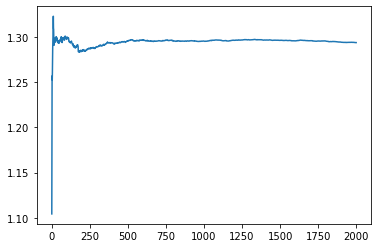

In [84]:
plt.plot([i for i in range(2000)], means_exp)

In [87]:
distance_intra_exp = np.mean(means_exp[300:500])
print(distance_intra_exp)

1.2930352022153317
